MW Hosts, HI containing ALFALFA dwarfs, COS sightlines

In [857]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from astropy.table import Table
import astropy.coordinates as coord
import astropy.units as u
from astroquery.ned import Ned
from astropy.coordinates import SkyCoord
from mpl_toolkits.mplot3d import axes3d
import random
import statistics as stats
from astroquery.mast import Observations

import re

from io import StringIO

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [858]:
alf = pd.read_csv("./tables/ALFALFA_catalog.csv") 

In [859]:
analogs = alf[(alf['Dist'] < 10.0) & (alf['W50'] > 150) & (alf['W50'] < 600) & (alf['Vhelio'] > 500) & (alf['Vhelio'] < 1000)]

In [860]:
analogs = alf[(alf['Dist'] < 10.0) & (alf['W50'] > 150) & (alf['W50'] < 600)]

In [861]:
analogs.columns

Index(['AGCNr', 'Name', 'RAdeg_HI', 'DECdeg_HI', 'RAdeg_OC', 'DECdeg_OC',
       'Vhelio', 'W50', 'sigW', 'W20', 'HIflux', 'sigflux', 'SNR', 'RMS',
       'Dist', 'sigDist', 'logMH', 'siglogMH', 'HIcode'],
      dtype='object')

In [862]:
analogs

,AGCNr,Name,RAdeg_HI,DECdeg_HI,RAdeg_OC,DECdeg_OC,Vhelio,W50,sigW,W20,HIflux,sigflux,SNR,RMS,Dist,sigDist,logMH,siglogMH,HIcode
2896,1117,N.598...,23.46625,30.68750,23.46208,30.66000,-182,181,2,197,999.90,0.63,128.7,17.99,0.8,0.1,8.20,0.10,1
3270,1256,N.672...,26.97417,27.42722,26.97458,27.43194,429,205,3,234,134.45,0.11,676.8,3.10,7.9,0.8,9.30,0.10,1
4691,1913,N.925...,36.80833,33.57833,36.81958,33.57917,552,204,2,222,263.04,0.15,23.9,4.01,9.1,0.9,9.71,0.09,1
9026,5079,N2903...,143.04416,21.50805,143.04001,21.50083,557,377,2,397,192.51,0.18,566.0,3.91,8.9,0.9,9.56,0.10,1
11625,5721,N3274...,158.07460,27.66750,158.07167,27.66861,541,160,2,174,50.32,0.09,353.0,2.51,6.5,0.6,8.70,0.10,1
12116,5840,N3344...,160.87915,24.92056,160.87915,24.92194,588,157,2,173,173.44,0.13,833.0,3.71,9.8,2.1,9.59,0.19,1
12139,5850,N3351...,160.98999,11.70417,160.98999,11.70333,777,270,2,283,51.91,0.12,239.4,2.95,9.3,0.9,9.03,0.10,1
12262,5882,N3368...,161.68916,11.82250,161.69041,11.81972,893,343,3,363,78.64,0.12,381.5,2.49,9.9,1.0,9.26,0.10,1
12519,5960,N3413...,162.84377,32.76305,162.83626,32.76639,642,156,2,179,15.23,0.07,132.0,2.06,8.9,4.1,8.45,0.40,1
12947,6079,N3486...,165.09958,28.97306,165.10042,28.97528,677,202,3,224,114.87,0.11,669.1,2.69,9.7,4.1,9.41,0.37,1


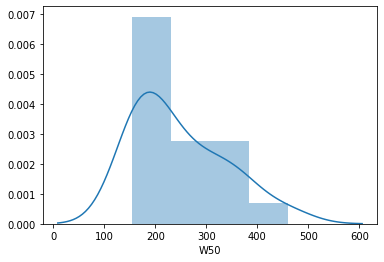

In [863]:
sb.distplot(analogs['W50'])

In [864]:
analogs['RAhr_OC'] = analogs['RAdeg_OC']*24.0/360.0

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [865]:
analogs['RAhr_HI'] = analogs['RAdeg_HI']*24.0/360.0

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [866]:
analogs[['Name']]

,Name
2896,N.598...
3270,N.672...
4691,N.925...
9026,N2903...
11625,N3274...
12116,N3344...
12139,N3351...
12262,N3368...
12519,N3413...
12947,N3486...


In [867]:
analogs[['AGCNr','Name','RAdeg_HI','DECdeg_HI','RAdeg_OC','DECdeg_OC','Dist','Vhelio']]

,AGCNr,Name,RAdeg_HI,DECdeg_HI,RAdeg_OC,DECdeg_OC,Dist,Vhelio
2896,1117,N.598...,23.46625,30.68750,23.46208,30.66000,0.8,-182
3270,1256,N.672...,26.97417,27.42722,26.97458,27.43194,7.9,429
4691,1913,N.925...,36.80833,33.57833,36.81958,33.57917,9.1,552
9026,5079,N2903...,143.04416,21.50805,143.04001,21.50083,8.9,557
11625,5721,N3274...,158.07460,27.66750,158.07167,27.66861,6.5,541
12116,5840,N3344...,160.87915,24.92056,160.87915,24.92194,9.8,588
12139,5850,N3351...,160.98999,11.70417,160.98999,11.70333,9.3,777
12262,5882,N3368...,161.68916,11.82250,161.69041,11.81972,9.9,893
12519,5960,N3413...,162.84377,32.76305,162.83626,32.76639,8.9,642
12947,6079,N3486...,165.09958,28.97306,165.10042,28.97528,9.7,677


In [868]:
analogs['useful COS data'] = np.nan

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [869]:
analogs['AGCNr'] = pd.to_numeric(analogs['AGCNr'])

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [870]:
#

analogs.loc[analogs['AGCNr'] == 1117,'useful COS data'] = 'yes, several'
analogs.loc[analogs['AGCNr'] == 1256,'useful COS data'] = 'no'
analogs.loc[analogs['AGCNr'] == 1913,'useful COS data'] = 'no'
analogs.loc[analogs['AGCNr'] == 5079,'useful COS data'] = 'one @260 kpc (both gratings)'
analogs.loc[analogs['AGCNr'] == 5840,'useful COS data'] = 'yes, one @37 kpc, just 130M, studied by Borthakur'
analogs.loc[analogs['AGCNr'] == 5721,'useful COS data'] = 'yes, lower exposure time, @42kpc, 160M only'
analogs.loc[analogs['AGCNr'] == 5850,'useful COS data'] = 'yes, several'
analogs.loc[analogs['AGCNr'] == 5882,'useful COS data'] = 'yes, several, mixed'
analogs.loc[analogs['AGCNr'] == 5960,'useful COS data'] = 'yes, one @191 kpc, both gratings'
analogs.loc[analogs['AGCNr'] == 6079,'useful COS data'] = 'yes, several, but only 130M, Bowen'
analogs.loc[analogs['AGCNr'] == 6272,'useful COS data'] = 'no'
analogs.loc[analogs['AGCNr'] == 7377,'useful COS data'] = 'yes, several, all 130M, except one'
analogs.loc[analogs['AGCNr'] == 6346,'useful COS data'] = 'yes, just G130M'
analogs.loc[analogs['AGCNr'] == 7440,'useful COS data'] = 'yes, just G130M, except one'
analogs.loc[analogs['AGCNr'] == 7694,'useful COS data'] = 'yes, two, both gratings'
analogs.loc[analogs['AGCNr'] == 7766,'useful COS data'] = 'yes, several'
analogs.loc[analogs['AGCNr'] == 8005,'useful COS data'] = 'no'
analogs.loc[analogs['AGCNr'] == 8062,'useful COS data'] = 'yes, G130M'
analogs.loc[analogs['AGCNr'] == 8271,'useful COS data'] = 'yes, limited'


In [871]:
analogs[['AGCNr','Name','RAdeg_HI','DECdeg_HI','RAdeg_OC','DECdeg_OC','Dist','Vhelio','useful COS data']]

,AGCNr,Name,RAdeg_HI,DECdeg_HI,RAdeg_OC,DECdeg_OC,Dist,Vhelio,useful COS data
2896,1117,N.598...,23.46625,30.68750,23.46208,30.66000,0.8,-182,"yes, several"
3270,1256,N.672...,26.97417,27.42722,26.97458,27.43194,7.9,429,no
4691,1913,N.925...,36.80833,33.57833,36.81958,33.57917,9.1,552,no
9026,5079,N2903...,143.04416,21.50805,143.04001,21.50083,8.9,557,one @260 kpc (both gratings)
11625,5721,N3274...,158.07460,27.66750,158.07167,27.66861,6.5,541,"yes, lower exposure time, @42kpc, 160M only"
12116,5840,N3344...,160.87915,24.92056,160.87915,24.92194,9.8,588,"yes, one @37 kpc, just 130M, studied by Borthakur"
12139,5850,N3351...,160.98999,11.70417,160.98999,11.70333,9.3,777,"yes, several"
12262,5882,N3368...,161.68916,11.82250,161.69041,11.81972,9.9,893,"yes, several, mixed"
12519,5960,N3413...,162.84377,32.76305,162.83626,32.76639,8.9,642,"yes, one @191 kpc, both gratings"
12947,6079,N3486...,165.09958,28.97306,165.10042,28.97528,9.7,677,"yes, several, but only 130M, Bowen"


In [872]:
alf['coords'] = np.nan

for i, row in alf.iterrows():
    if(i%100 == 0):
        print(i)
    ra_deg = alf['RAdeg_HI'].iloc[i]
    dec_deg = alf['DECdeg_HI'].iloc[i]
    dist = alf['Dist'].iloc[i]
    alf['coords'][i] = SkyCoord(ra_deg*u.degree, dec_deg*u.degree, distance = dist*u.mpc, frame='icrs')

0
100
200


/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18500
18600


In [873]:
#TO DO this assumes one analog per catalog member

ngc672 = SkyCoord(26.97417*u.deg, 27.42722*u.deg, distance = 7.9*u.mpc, frame='icrs')
ngc925 = SkyCoord(36.80833*u.deg, 33.57833*u.deg, distance = 9.1*u.mpc, frame='icrs')
ngc2903 = SkyCoord(143.04416*u.deg, 21.50805*u.deg, distance = 8.9*u.mpc, frame='icrs')
ngc3274 = SkyCoord(158.07460*u.deg, 27.66750*u.deg, distance = 6.5*u.mpc, frame='icrs')
ngc3344 = SkyCoord(160.87915*u.deg, 24.92056*u.deg, distance = 9.8*u.mpc, frame='icrs')
ngc3351 = SkyCoord(160.98999*u.deg, 11.70417*u.deg, distance = 9.3*u.mpc, frame='icrs')
ngc3368 = SkyCoord(161.68916*u.deg, 11.82250*u.deg, distance = 8.9*u.mpc, frame='icrs')
ngc3486 = SkyCoord(165.09958*u.deg, 28.97306*u.deg, distance = 9.7*u.mpc, frame='icrs')
ngc3593 = SkyCoord(168.65042*u.deg, 12.81417*u.deg, distance = 8.9*u.mpc, frame='icrs')
ngc3627 = SkyCoord(170.06291*u.deg, 12.98833*u.deg, distance = 9.4*u.mpc, frame='icrs')
ngc4274 = SkyCoord(184.96124*u.deg, 29.61722*u.deg, distance = 9.6*u.mpc, frame='icrs')
ngc4310 = SkyCoord(185.60875*u.deg, 29.20444*u.deg, distance = 9.5*u.mpc, frame='icrs')
ngc4517 = SkyCoord(188.18626*u.deg, 0.11333*u.deg, distance = 8.3*u.mpc, frame='icrs')
ngc4559 = SkyCoord(188.18626*u.deg, 27.95778*u.deg, distance = 7.3*u.mpc, frame='icrs')
ngc4747 = SkyCoord(188.99500*u.deg, 25.78861*u.deg, distance = 9.1*u.mpc, frame='icrs')
ngc4826 = SkyCoord(192.96001*u.deg, 21.65972*u.deg, distance = 4.4*u.mpc, frame='icrs')
ngc5014 = SkyCoord(197.85291*u.deg, 36.17500*u.deg, distance = 8.1*u.mpc, frame='icrs')


analogs = ['ngc672','ngc925','ngc2903','ngc3274','ngc3344','ngc3351','ngc3368','ngc3486','ngc3593','ngc3627','ngc4274','ngc4310','ngc4517','ngc4559','ngc4747','ngc4826','ngc5014']
analogs_coords = [ngc672,ngc925,ngc2903,ngc3274,ngc3344,ngc3351,ngc3368,ngc3486,ngc3593,ngc3627,ngc4274,ngc4310,ngc4517,ngc4559,ngc4747,ngc4826,ngc5014]

for a in range(0,len(analogs)):
    print(analogs[a],analogs_coords[a])

ngc672 <SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, mpc)
    (26.97417, 27.42722, 7.9)>
ngc925 <SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, mpc)
    (36.80833, 33.57833, 9.1)>
ngc2903 <SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, mpc)
    (143.04416, 21.50805, 8.9)>
ngc3274 <SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, mpc)
    (158.0746, 27.6675, 6.5)>
ngc3344 <SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, mpc)
    (160.87915, 24.92056, 9.8)>
ngc3351 <SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, mpc)
    (160.98999, 11.70417, 9.3)>
ngc3368 <SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, mpc)
    (161.68916, 11.8225, 8.9)>
ngc3486 <SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, mpc)
    (165.09958, 28.97306, 9.7)>
ngc3593 <SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, mpc)
    (168.65042, 12.81417, 8.9)>
ngc3627 <SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, mpc)
    (170.06291, 12.98833, 9.4)>
ngc4274 <SkyCoord (ICRS): (ra, dec, d

In [ ]:
#Note his assumes one analog per catalog member

alf['host'] = np.nan
alf['host_sep'] = np.nan

ngc672 = SkyCoord(26.97417*u.deg, 27.42722*u.deg, distance = 7.9*u.mpc, frame='icrs')
ngc925 = SkyCoord(36.80833*u.deg, 33.57833*u.deg, distance = 9.1*u.mpc, frame='icrs')
ngc2903 = SkyCoord(143.04416*u.deg, 21.50805*u.deg, distance = 8.9*u.mpc, frame='icrs')
ngc3274 = SkyCoord(158.07460*u.deg, 27.66750*u.deg, distance = 6.5*u.mpc, frame='icrs')
ngc3344 = SkyCoord(160.87915*u.deg, 24.92056*u.deg, distance = 9.8*u.mpc, frame='icrs')
ngc3351 = SkyCoord(160.98999*u.deg, 11.70417*u.deg, distance = 9.3*u.mpc, frame='icrs')
ngc3368 = SkyCoord(161.68916*u.deg, 11.82250*u.deg, distance = 8.9*u.mpc, frame='icrs')
ngc3486 = SkyCoord(165.09958*u.deg, 28.97306*u.deg, distance = 9.7*u.mpc, frame='icrs')
ngc3593 = SkyCoord(168.65042*u.deg, 12.81417*u.deg, distance = 8.9*u.mpc, frame='icrs')
ngc3627 = SkyCoord(170.06291*u.deg, 12.98833*u.deg, distance = 9.4*u.mpc, frame='icrs')
ngc4274 = SkyCoord(184.96124*u.deg, 29.61722*u.deg, distance = 9.6*u.mpc, frame='icrs')
ngc4310 = SkyCoord(185.60875*u.deg, 29.20444*u.deg, distance = 9.5*u.mpc, frame='icrs')
ngc4517 = SkyCoord(188.18626*u.deg, 0.11333*u.deg, distance = 8.3*u.mpc, frame='icrs')
ngc4559 = SkyCoord(188.18626*u.deg, 27.95778*u.deg, distance = 7.3*u.mpc, frame='icrs')
ngc4747 = SkyCoord(188.99500*u.deg, 25.78861*u.deg, distance = 9.1*u.mpc, frame='icrs')
ngc4826 = SkyCoord(192.96001*u.deg, 21.65972*u.deg, distance = 4.4*u.mpc, frame='icrs')
ngc5014 = SkyCoord(197.85291*u.deg, 36.17500*u.deg, distance = 8.1*u.mpc, frame='icrs')

analogs = ['ngc672','ngc925','ngc2903','ngc3274','ngc3344','ngc3351','ngc3368','ngc3486','ngc3593','ngc3627','ngc4274','ngc4310','ngc4517','ngc4559','ngc4747','ngc4826','ngc5014']
analogs_coords = [ngc672,ngc925,ngc2903,ngc3274,ngc3344,ngc3351,ngc3368,ngc3486,ngc3593,ngc3627,ngc4274,ngc4310,ngc4517,ngc4559,ngc4747,ngc4826,ngc5014]
    
search_range_mpc = 0.3

for a in range(0,len(analogs)):
    print(analogs[a])
    ang_size = (206265.0*(search_range_mpc/analogs_coords[a].distance.mpc))/3600.0
    for i, row in alf.iterrows():
        if(i%10000 == 0):
            print('Analog ' + str(a+1) + ' of ' + str(len(analogs)+1) + ' ' + str((i/len(alf['Name'])*100)) + '%')
        sep = alf['coords'].iloc[i].separation(analogs_coords[a])
        if ((sep.degree < ang_size) & (abs(analogs_coords[a].distance.mpc-alf['Dist'][i]) < search_range_mpc)):
            sep_3d = alf['coords'][i].separation_3d(analogs_coords[a])
            if (sep_3d.mpc < search_range_mpc):
                alf['host'][i] = analogs[a]
                alf['host_sep'][i] = sep_3d

ngc672
Analog 1 of 18 0.0%


/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Analog 1 of 18 0.3174401625293632%
Analog 1 of 18 0.6348803250587264%
Analog 1 of 18 0.9523204875880896%
ngc925
Analog 2 of 18 0.0%
Analog 2 of 18 0.3174401625293632%
Analog 2 of 18 0.6348803250587264%
Analog 2 of 18 0.9523204875880896%
ngc2903
Analog 3 of 18 0.0%
Analog 3 of 18 0.3174401625293632%
Analog 3 of 18 0.6348803250587264%
Analog 3 of 18 0.9523204875880896%
ngc3274
Analog 4 of 18 0.0%
Analog 4 of 18 0.3174401625293632%
Analog 4 of 18 0.6348803250587264%
Analog 4 of 18 0.9523204875880896%
ngc3344
Analog 5 of 18 0.0%
Analog 5 of 18 0.3174401625293632%
Analog 5 of 18 0.6348803250587264%
Analog 5 of 18 0.9523204875880896%
ngc3351
Analog 6 of 18 0.0%
Analog 6 of 18 0.3174401625293632%
Analog 6 of 18 0.6348803250587264%
Analog 6 of 18 0.9523204875880896%
ngc3368
Analog 7 of 18 0.0%
Analog 7 of 18 0.3174401625293632%
Analog 7 of 18 0.6348803250587264%
Analog 7 of 18 0.9523204875880896%
ngc3486
Analog 8 of 18 0.0%
Analog 8 of 18 0.3174401625293632%
Analog 8 of 18 0.6348803250587264%


In [844]:
sats = alf[alf['host'].notnull()]

In [845]:
sats.columns

Index(['AGCNr', 'Name', 'RAdeg_HI', 'DECdeg_HI', 'RAdeg_OC', 'DECdeg_OC',
       'Vhelio', 'W50', 'sigW', 'W20', 'HIflux', 'sigflux', 'SNR', 'RMS',
       'Dist', 'sigDist', 'logMH', 'siglogMH', 'HIcode', 'Loc', 'sep_2903',
       'host', 'host_sep', 'coords'],
      dtype='object')

In [849]:
sats['host_sep_kpc'] = sats['host_sep']*1000.0

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [850]:
sats[['Name','host','host_sep_kpc']]

,Name,host,host_sep_kpc
3082,KK.13...,ngc672,2.460999e+02
3270,N.672...,ngc672,4.440892e-13
4691,N.925...,ngc925,0.000000e+00
9026,N2903...,ngc2903,0.000000e+00
11625,N3274...,ngc3274,0.000000e+00
12116,N3344...,ngc3344,8.881784e-13
12139,N3351...,ngc3351,4.440892e-12
12877,........,ngc3486,1.240359e+02
12918,........,ngc3486,1.204491e+02
12947,N3486...,ngc3486,0.000000e+00


In [846]:
sats[['host','host_sep','logMH','W50','Dist']].groupby('host').describe()

host_sep                                                      \
           count          mean       std           min           25%   
host                                                                   
ngc2903      1.0  0.000000e+00       NaN  0.000000e+00  0.000000e+00   
ngc3274      1.0  0.000000e+00       NaN  0.000000e+00  0.000000e+00   
ngc3344      1.0  8.881784e-16       NaN  8.881784e-16  8.881784e-16   
ngc3351      1.0  4.440892e-15       NaN  4.440892e-15  4.440892e-15   
ngc3486      5.0  1.097868e-01  0.066640  0.000000e+00  1.204491e-01   
ngc3593      1.0  4.440892e-16       NaN  4.440892e-16  4.440892e-16   
ngc3627      1.0  3.996803e-15       NaN  3.996803e-15  3.996803e-15   
ngc4274      3.0  2.718493e-01  0.018168  2.517995e-01  2.641642e-01   
ngc4310      7.0  1.619103e-01  0.095610  0.000000e+00  1.103061e-01   
ngc4517      1.0  0.000000e+00       NaN  0.000000e+00  0.000000e+00   
ngc4559      1.0  9.101448e-02       NaN  9.101448e-02  9.101448e-02   
ngc4826      1.0  8.876672e-02       NaN  8.876672e-02  8.876672e-02   
ngc5014      1.0  0.000000e+00       NaN  0.000000e+00  0.000000e+00   
ngc672       2.0  1.230500e-01  0.174019  4.440892e-16  6.152498e-02   
ngc925       1.0  0.000000e+00       NaN  0.000000e+00  0.000000e+00   

                                                  logMH            ...  \
                  50%           75%           max count      mean  ...   
host                                                               ...   
ngc2903  0.000000e+00  0.000000e+00  0.000000e+00   1.0  9.560000  ...   
ngc3274  0.000000e+00  0.000000e+00  0.000000e+00   1.0  8.700000  ...   
ngc3344  8.881784e-16  8.881784e-16  8.881784e-16   1.0  9.590000  ...   
ngc3351  4.440892e-15  4.440892e-15  4.440892e-15   1.0  9.030000  ...   
ngc3486  1.222933e-01  1.240359e-01  1.821557e-01   5.0  7.730000  ...   
ngc3593  4.440892e-16  4.440892e-16  4.440892e-16   1.0  8.330000  ...   
ngc3627  3.996803e-15  3.996803e-15  3.996803e-15   1.0  8.920000  ...   
ngc4274  2.765288e-01  2.818742e-01  2.872196e-01   3.0  7.253333  ...   
ngc4310  1.903587e-01  2.376093e-01  2.471829e-01   7.0  7.698571  ...   
ngc4517  0.000000e+00  0.000000e+00  0.000000e+00   1.0  9.320000  ...   
ngc4559  9.101448e-02  9.101448e-02  9.101448e-02   1.0  9.520000  ...   
ngc4826  8.876672e-02  8.876672e-02  8.876672e-02   1.0  8.260000  ...   
ngc5014  0.000000e+00  0.000000e+00  0.000000e+00   1.0  7.290000  ...   
ngc672   1.230500e-01  1.845750e-01  2.460999e-01   2.0  8.290000  ...   
ngc925   0.000000e+00  0.000000e+00  0.000000e+00   1.0  9.710000  ...   

            W50         Dist                                                    
            75%    max count      mean       std  min    25%   50%    75%  max  
host                                                                            
ngc2903  377.00  377.0   1.0  8.900000       NaN  8.9  8.900  8.90  8.900  8.9  
ngc3274  160.00  160.0   1.0  6.500000       NaN  6.5  6.500  6.50  6.500  6.5  
ngc3344  157.00  157.0   1.0  9.800000       NaN  9.8  9.800  9.80  9.800  9.8  
ngc3351  270.00  270.0   1.0  9.300000       NaN  9.3  9.300  9.30  9.300  9.3  
ngc3486   81.00  202.0   5.0  9.740000  0.089443  9.6  9.700  9.80  9.800  9.8  
ngc3593  254.00  254.0   1.0  8.900000       NaN  8.9  8.900  8.90  8.900  8.9  
ngc3627  369.00  369.0   1.0  9.400000       NaN  9.4  9.400  9.40  9.400  9.4  
ngc4274   48.50   53.0   3.0  9.766667  0.057735  9.7  9.750  9.80  9.800  9.8  
ngc4310  130.00  459.0   7.0  9.500000  0.115470  9.4  9.400  9.50  9.550  9.7  
ngc4517  301.00  301.0   1.0  8.300000       NaN  8.3  8.300  8.30  8.300  8.3  
ngc4559  236.00  236.0   1.0  7.300000       NaN  7.3  7.300  7.30  7.300  7.3  
ngc4826  312.00  312.0   1.0  4.400000       NaN  4.4  4.400  4.40  4.400  4.4  
ngc5014  168.00  168.0   1.0  8.100000       NaN  8.1  8.100  8.10  8.100  8.1  
ngc672   161.25  205.0   2.0  7.850000  0.070711  7.8  7.825  7.85  7.875  7.9  
n

In [ ]:
ngc3486

In [ ]:
ngc4310

In [854]:
sightlines[sightlines['Galaxy Name'] == 'NGC 3486']

,Galaxy Name,analog_ra,analog_dec,analog_coords,analog_vel,analog_dist,impact_param,s_ra,s_dec,Filter,t_exptime,proposal_pi,target_name,coords,S/N,match_sep,QSO_list_name,n_sats
86,NGC 3486,165.1,28.9753,"<SkyCoord (ICRS): (ra, dec) in deg\n (165.1...",677.0,9.7,60.017153,165.462733,29.134547,G130M,2100.288,"Bowen, David V.",SDSSJ110151.07+290803.6,"<SkyCoord (ICRS): (ra, dec) in deg\n (165.4...",NaN,NaN,NaN,9.0
87,NGC 3486,165.1,28.9753,"<SkyCoord (ICRS): (ra, dec) in deg\n (165.1...",677.0,9.7,60.017153,165.462733,29.134547,G130M,2563.744,"Bowen, David V.",SDSSJ110151.07+290803.6,"<SkyCoord (ICRS): (ra, dec) in deg\n (165.4...",NaN,NaN,NaN,9.0
88,NGC 3486,165.1,28.9753,"<SkyCoord (ICRS): (ra, dec) in deg\n (165.1...",677.0,9.7,60.398253,165.218000,28.633722,G130M,2068.352,"Bowen, David V.",SDSSJ110052.33+283801.2,"<SkyCoord (ICRS): (ra, dec) in deg\n (165.2...",7.911654,0.000122,SDSSJ110052.33+283801.2,9.0
89,NGC 3486,165.1,28.9753,"<SkyCoord (ICRS): (ra, dec) in deg\n (165.1...",677.0,9.7,60.398253,165.218000,28.633722,G130M,2590.720,"Bowen, David V.",SDSSJ110052.33+283801.2,"<SkyCoord (ICRS): (ra, dec) in deg\n (165.2...",7.911654,0.000122,SDSSJ110052.33+283801.2,9.0
91,NGC 3486,165.1,28.9753,"<SkyCoord (ICRS): (ra, dec) in deg\n (165.1...",677.0,9.7,108.230328,165.781604,29.208472,G130M,7265.888,"Bowen, David V.",SDSSJ110307.57+291230.0,"<SkyCoord (ICRS): (ra, dec) in deg\n (165.7...",10.297082,0.000177,SDSSJ110307.57+291230.0,9.0
98,NGC 3486,165.1,28.9753,"<SkyCoord (ICRS): (ra, dec) in deg\n (165.1...",677.0,9.7,229.414933,166.551000,29.458500,G130M,5680.768,"Bowen, David V.",SDSSJ110612.25+292730.6,"<SkyCoord (ICRS): (ra, dec) in deg\n (166.5...",4.859933,0.000268,SDSSJ110612.25+292730.6,9.0
97,NGC 3486,165.1,28.9753,"<SkyCoord (ICRS): (ra, dec) in deg\n (165.1...",677.0,9.7,229.414933,166.551000,29.458500,G130M,4517.568,"Bowen, David V.",SDSSJ110612.25+292730.6,"<SkyCoord (ICRS): (ra, dec) in deg\n (166.5...",4.859933,0.000268,SDSSJ110612.25+292730.6,9.0
96,NGC 3486,165.1,28.9753,"<SkyCoord (ICRS): (ra, dec) in deg\n (165.1...",677.0,9.7,202.653408,166.461450,28.858628,G130M,7343.872,"Bowen, David V.",SDSSJ110550.72+285130.8,"<SkyCoord (ICRS): (ra, dec) in deg\n (166.4...",2.629932,0.000332,SDSSJ110550.72+285130.8,9.0
95,NGC 3486,165.1,28.9753,"<SkyCoord (ICRS): (ra, dec) in deg\n (165.1...",677.0,9.7,202.653408,166.461450,28.858628,G130M,10535.680,"Bowen, David V.",SDSSJ110550.72+285130.8,"<SkyCoord (ICRS): (ra, dec) in deg\n (166.4...",2.629932,0.000332,SDSSJ110550.72+285130.8,9.0
94,NGC 3486,165.1,28.9753,"<SkyCoord (ICRS): (ra, dec) in deg\n (165.1...",677.0,9.7,186.766556,166.055625,28.258389,G130M,7235.744,"Bowen, David V.",SDSSJ110413.32+281530.3,"<SkyCoord (ICRS): (ra, dec) in deg\n (166.0...",1.627827,0.000356,SDSSJ110413.32+281530.3,9.0


In [ ]:
sightlines[sightlines['Galaxy Name'] == 'NGC 3486']

In [802]:
temp = gals_merged[gals_merged['MHI_type'] == 'blue']
temp = temp[temp['MHI_computed'].notnull()]

NameError: name 'gals_merged' is not defined

In [59]:
alf['coords'] = np.nan

for i in range(0, len(sightlines['Galaxy Name'])):
    for j in range(0,len(alf['RAdeg_OC'])):
        alf['coords'].iloc[j] = SkyCoord(ra=alf['RAdeg_OC'].iloc[j], dec=alf['DECdeg_OC'].iloc[i],frame='icrs',unit=(u.deg, u.deg))
        
        analog_ra = sightlines['analog_coords'].iloc[i].ra.deg
        analog_dec = sightlines['analog_coords'].iloc[i].dec.deg
        sep = alf['coords'].iloc[j].separation(sightlines['coords'].iloc[i])
        
        print(alf['RAdeg_OC'].iloc[j],analog_ra,alf['DECdeg_OC'].iloc[j],analog_dec, sep.arcmin)
        #um, this should def be binary search
        if(sep.arcmin < 10.0):
            print('match',host_galaxy,analog_ra,sep.arcmin)

KeyError: 'Galaxy Name'

# HIPASS catalog

In [38]:
hipass = pd.read_csv("./HOPCAT2005TabSep.txt",sep='\t') 

In [39]:
list(hipass.columns)

['ID_Numbers',
 'HicatName',
 'RA',
 'Dec',
 'Velocity',
 'Velocity Width',
 'Peak Flux Density',
 'Integrated Flux',
 'Optical Semi-Major Axis',
 'Optical Semi-Minor Axis',
 'Optical Angle',
 '6dF Velocity',
 'NED  Velocity',
 'Match Class)',
 'Optical RA Degrees',
 'Optical Dec Degrees',
 'Optical RA H:M:S',
 'Optical Dec D:M:S',
 'Blue Magnitude',
 'Red Magnitude',
 'I Magnitude',
 'Blue SuperCOS Plate No.',
 'Red SuperCOS Plate No.',
 'I SuperCOS Plate No.',
 'l',
 'b',
 'Extinction',
 'RA Position  Sep',
 'Dec Position  Sep',
 'Galaxy Position Sep',
 'AxisRatio',
 'Galaxy Name',
 'Morphology']

In [40]:
hipass

,ID_Numbers,HicatName,RA,Dec,Velocity,Velocity Width,Peak Flux Density,Integrated Flux,Optical Semi-Major Axis,Optical Semi-Minor Axis,...,I SuperCOS Plate No.,l,b,Extinction,RA Position Sep,Dec Position Sep,Galaxy Position Sep,AxisRatio,Galaxy Name,Morphology
0,ID,hipass_name,ra_str,dec_str,vel_mom,width_50max,Sp,Sint,A_IMAGE,B_IMAGE,...,IPlateNumber,HicatExtl,HicatExtb,HicatExt,DiffRaArcMin,DiffDecArcMin,GalSepArcMin,AxisRatio,Galaxy_Name,Morphology
1,1,HIPASSJ0146-89,01:56:13.1,-89:18:49,2452.8,228,0.068,12.3,33.156,13.498,...,19408,302.7155,-27.7873,0.1347,2.5093,1.2466,2.8013,2.4564,NGC 2573,SAB(rs+)c
2,2,HIPASSJ2311-89,23:08:01.3,-89:06:38,2525.4,160.5,0.2035,34,21.448,6.954,...,19408,303.3709,-27.928,0.1459,0.1072,0.3414,0.3579,3.0843,NGC 2573B,IBm? pec
3,3,HIPASSJ0852-88,08:54:24.7,-88:03:59,4974.3,200.8,0.042,6.1,16.249,9.449,...,19408,301.0809,-26.1277,0.1391,0.69,1.4136,1.573,1.7197,ESO 001- G 005,Sa-b
4,4,HIPASSJ1427-87,14:30:16.5,-87:48:45,2251.4,312.7,0.118,27.4,48.614,12.453,...,19408,303.9418,-25.1374,0.1265,1.6797,-2.4369,2.9596,3.9038,ESO 001- G 006,SA:(rs)bc:
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4311,6300,HIPASSJ0320+01,03:20:14.8,01:20:11,6791.6,133.1,0.0347,4,32.707,7.654,...,11437,180.5154,-44.271,0.1226,2.7937,-1.5269,3.1837,4.2732,UGC 02679,(R')SB(rs)b:
4312,6303,HIPASSJ0643-25,06:43:40.8,-25:46:13,2505.6,111.9,0.0395,4,XXXXX,XXXXX,...,12327,235.4447,-13.0245,0.0979,XXXXX,XXXXX,XXXXX,XXXXX,XXXXX,XXXXX
4313,6305,HIPASSJ1938-01,19:38:46.5,-01:23:45,6262,98.7,0.045,4.5,12.594,9.193,...,15138,37.1293,-11.1615,0.3293,5.3529,-0.4661,5.3732,1.37,CGMW 3-4465,XXXXX
4314,6306,HIPASSJ1253-22,12:53:00.9,-22:14:53,3463.6,64.6,0.0577,3.6,17.801,6.93,...,15577,301.8879,40.5837,0.0672,4.8049,-3.2656,5.8096,2.5687,ESO 575- G 017,SB...


In [41]:
hipass = hipass.drop([0])

In [42]:
hipass['Velocity Width'] = pd.to_numeric(hipass['Velocity Width'])

In [43]:
hi_ana = hipass[(hipass['Velocity Width'] > 150) & (hipass['Velocity Width'] < 600)]

In [44]:
hi_ana = hi_ana[hi_ana['Morphology'].str.contains('S', regex=False)]

In [45]:
hi_ana['Velocity'] = pd.to_numeric(hi_ana['Velocity'])

In [46]:
hi_ana = hi_ana[hi_ana['Velocity'] < 1400.0]

In [47]:
hi_ana['WALLABY'] = np.nan
hi_ana['Loc'] = np.nan
hi_ana = hi_ana.reindex()

for i, row in hi_ana.iterrows():
    if(i%100 == 0):
        print(i)
    ra = hi_ana['RA'].loc[i]
    dec = hi_ana['Dec'].loc[i]
    hi_ana['Loc'].loc[i] = SkyCoord(ra, dec, unit=(u.hour, u.deg),frame='icrs')

In [48]:
#Norma 16 - 17:20 -57 - -62:30
#NGC4636 12:28 - 12:50 7:30- -3:30
#Hydra Cluster 10:04-10:55 -25:30 - -30:30

hi_ana['WALLABY'] = np.nan
hi_ana['wallaby_patch'] = np.nan

for i, row in hi_ana.iterrows():
    if(i%100 == 0):
        print(i)
    if((hi_ana['Loc'].loc[i].dec.degree < 30.0)): 
        hi_ana['WALLABY'].loc[i] = 2

    if((hi_ana['Loc'].loc[i].ra.hour > 16.0) & (hi_ana['Loc'].loc[i].ra.hour < 17.55) & (hi_ana['Loc'].loc[i].dec.degree > -62.5) & (hi_ana['Loc'].loc[i].dec.degree < -57.0)):
        print(i)
        hi_ana['WALLABY'].loc[i] = 1
        hi_ana['wallaby_patch'].loc[i] = 'Norma'
    elif((hi_ana['Loc'].loc[i].ra.hour > 12.4) & (hi_ana['Loc'].loc[i].ra.hour < 12.833) & (hi_ana['Loc'].loc[i].dec.degree > -3.5) & (hi_ana['Loc'].loc[i].dec.degree < 7.5)):
        print(i)
        hi_ana['WALLABY'].loc[i] = 1
        hi_ana['wallaby_patch'].loc[i] = 'NGC4636'
    elif((hi_ana['Loc'].loc[i].ra.hour < 10.916) & (hi_ana['Loc'].loc[i].ra.hour > 10.06) & (hi_ana['Loc'].loc[i].dec.degree < -25.5) & (hi_ana['Loc'].loc[i].dec.degree > -30.5)):
        print(i)
        hi_ana['WALLABY'].loc[i] = 1
        hi_ana['wallaby_patch'].loc[i] = 'HydraCluster'

580
591
721
2306
2318
2343
2435
4082
4130
4168


In [49]:
wallaby = hi_ana[hi_ana['WALLABY']==1]
wallaby[['Galaxy Name','RA','Dec','Velocity','Velocity Width','Morphology','wallaby_patch']]

,Galaxy Name,RA,Dec,Velocity,Velocity Width,Morphology,wallaby_patch
580,ESO 138- G 010,16:58:59.7,-60:13:26,1146.9,210.7,SA(s)cd,Norma
591,ESO 137- G 027,16:26:25.4,-59:59:09,1376.3,197.3,SB(s)dm:;ext.LSB dsk,Norma
721,ESO 179-IG 013,16:47:19.0,-57:26:53,845.3,174.0,SB(s)dm,Norma
2306,NGC 3137,10:09:05.6,-29:02:42,1114.3,253.0,SA(s)d,HydraCluster
2318,NGC 3175,10:14:43.7,-28:51:51,1081.1,290.2,SAB(s)b,HydraCluster
2343,NGC 3113,10:04:37.6,-28:26:29,1081.2,200.9,SB(rs)d,HydraCluster
2435,UGCA 196,10:03:42.5,-27:00:21,953.0,194.3,(R')SA(s)b,HydraCluster
4082,NGC 4629,12:42:35.4,-01:20:18,1108.9,154.2,SAB(s)m pec,NGC4636
4130,NGC 4592,12:39:17.5,-00:31:24,1073.0,202.8,SA(s)dm:,NGC4636
4168,NGC 4517,12:32:44.7,00:07:36,1133.6,307.4,SA(s)cd: sp,NGC4636


In [50]:
wallaby['Dist'] = np.nan

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
#From D(Virgo+GA+Shapley) from NED (rounded)
wallaby.loc[wallaby['Galaxy Name'] == 'ESO 137- G 027','Dist'] = 18.6
wallaby.loc[wallaby['Galaxy Name'] == 'ESO 138- G 010','Dist'] = 15.6
wallaby.loc[wallaby['Galaxy Name'] == 'ESO 179-IG 013','Dist'] = 11.2
wallaby.loc[wallaby['Galaxy Name'] == 'NGC 3137','Dist'] = 14.7
wallaby.loc[wallaby['Galaxy Name'] == 'NGC 3175','Dist'] = 14.7
wallaby.loc[wallaby['Galaxy Name'] == 'NGC 3113','Dist'] = 14.4
wallaby.loc[wallaby['Galaxy Name'] == 'UGCA 196','Dist'] = 12.0
wallaby.loc[wallaby['Galaxy Name'] == 'NGC 4629','Dist'] = 19.1
wallaby.loc[wallaby['Galaxy Name'] == 'NGC 4592','Dist'] = 15.6

#From multiple refs TRGB
wallaby.loc[wallaby['Galaxy Name'] == 'NGC 4517','Dist'] = 8.34

In [52]:
wallaby['coords'] = np.nan
for i in range(0,len(wallaby['coords'])):
    wallaby['coords'].iloc[i] = SkyCoord(ra=wallaby['RA'].iloc[i], dec=wallaby['Dec'].iloc[i],frame='icrs',unit=(u.hourangle, u.deg))

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [53]:
sightlines = pd.DataFrame(columns=['GalaxyName', 'analog_ra','analog_dec','analog_coords','analog_vel','analog_dist','impact_param','s_ra','s_dec','filters','t_exptime','proposal_pi','target_name'])

In [54]:
sightlines

,GalaxyName,analog_ra,analog_dec,analog_coords,analog_vel,analog_dist,impact_param,s_ra,s_dec,filters,t_exptime,proposal_pi,target_name


In [55]:
wallaby.columns

Index(['ID_Numbers', 'HicatName', 'RA', 'Dec', 'Velocity', 'Velocity Width',
       'Peak Flux Density', 'Integrated Flux', 'Optical Semi-Major Axis',
       'Optical Semi-Minor Axis', 'Optical Angle', '6dF Velocity',
       'NED  Velocity', 'Match Class)', 'Optical RA Degrees',
       'Optical Dec Degrees', 'Optical RA H:M:S', 'Optical Dec D:M:S',
       'Blue Magnitude', 'Red Magnitude', 'I Magnitude',
       'Blue SuperCOS Plate No.', 'Red SuperCOS Plate No.',
       'I SuperCOS Plate No.', 'l', 'b', 'Extinction', 'RA Position  Sep',
       'Dec Position  Sep', 'Galaxy Position Sep', 'AxisRatio', 'Galaxy Name',
       'Morphology', 'WALLABY', 'Loc', 'wallaby_patch', 'Dist', 'coords'],
      dtype='object')

In [56]:
for i in range(0,len(wallaby['coords'])):
    name = wallaby['Galaxy Name'].iloc[i]
    radius = str((206265*((300*10**3)/(wallaby['Dist'].iloc[i]*10**6)))/3600.0)+ ' deg'
    observations = Observations.query_region(wallaby['coords'].iloc[i],radius=radius)
    relevant = Table.to_pandas(observations[observations['instrument_name'] == 'COS/FUV'])
    
    for j in range(0,len(relevant['filters'])):
        print(wallaby['Galaxy Name'].iloc[i],relevant['s_ra'].iloc[j],relevant['s_dec'].iloc[j],relevant['filters'].iloc[j],relevant['t_exptime'].iloc[j],relevant['target_name'].iloc[j])
        sightlines = sightlines.append({'GalaxyName':wallaby['Galaxy Name'].iloc[i],'analog_ra':wallaby['RA'].iloc[i],'analog_dec':wallaby['Dec'].iloc[i],'analog_vel':wallaby['Velocity'].iloc[i],'analog_dist':wallaby['Dist'].iloc[i],'impact_param':np.nan,'s_ra':relevant['s_ra'].iloc[j],'s_dec':relevant['s_dec'].iloc[j],'filters':relevant['filters'].iloc[j],'t_exptime':relevant['t_exptime'].iloc[j],'proposal_pi':relevant['proposal_pi'].iloc[j],'target_name':relevant['target_name'].iloc[j]},ignore_index = True)

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3319: TableReplaceWarning: converted column 'sequence_number' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


NGC 3137 151.6386666667 -29.93522222222 G130M 2549.184 NGC3125-1
NGC 3137 151.6386666667 -29.93522222222 G130M 2971.2 NGC3125-1
NGC 3175 153.9968333333 -27.808 G160M 1924.128 2MASS-J10155924-2748289
NGC 3175 153.9968333333 -27.808 G160M 2060.064 2MASS-J10155924-2748289
NGC 3175 153.9968333333 -27.808 G160M 1963.328 2MASS-J10155924-2748289
NGC 3175 153.9968333333 -27.808 G160M 1974.176 2MASS-J10155924-2748289
NGC 3175 153.9968333333 -27.808 G130M 1390.176 2MASS-J10155924-2748289
NGC 3175 153.9968333333 -27.808 G130M 1390.176 2MASS-J10155924-2748289
NGC 3175 153.9968333333 -27.808 G130M 1391.168 2MASS-J10155924-2748289
NGC 3175 153.9968333333 -27.808 G130M 1391.2 2MASS-J10155924-2748289
NGC 3113 152.110525 -27.59564444444 G130M 2959.0 UVQSJ100826.52-273544.3
NGC 3113 152.110525 -27.59564444444 G160M 2362.528 UVQSJ100826.52-273544.3
NGC 3113 152.110525 -27.59564444444 G160M 1940.0 UVQSJ100826.52-273544.3
UGCA 196 152.110525 -27.59564444444 G130M 2959.0 UVQSJ100826.52-273544.3
UGCA 196 152

In [60]:
sightlines = sightlines[sightlines['filters'] != 'G140L']

In [61]:
sightlines['coords'] = np.nan
sightlines['analog_coords'] = np.nan

for i in range(0,len(sightlines['GalaxyName'])):
    sightlines['coords'].iloc[i] = SkyCoord(ra=sightlines['s_ra'].iloc[i], dec=sightlines['s_dec'].iloc[i],frame='icrs',unit=(u.deg, u.deg))
    if(type(sightlines['analog_ra'].iloc[i]) == str):
        sightlines['analog_coords'].iloc[i] = SkyCoord(ra=sightlines['analog_ra'].iloc[i], dec=sightlines['analog_dec'].iloc[i],frame='icrs',unit=(u.hourangle, u.deg))
    else:
        sightlines['analog_coords'].iloc[i] = SkyCoord(ra=sightlines['analog_ra'].iloc[i], dec=sightlines['analog_dec'].iloc[i],frame='icrs',unit=(u.deg, u.deg))

    #sightlines['coords'].iloc[i] = SkyCoord(ra=sightlines['analog_ra'].iloc[i], dec=sightlines['analog_dec'].iloc[i],frame='icrs',unit=(u.hourangle, u.deg))
    c1 = sightlines['analog_coords'].iloc[i]
    c2 = sightlines['coords'].iloc[i]
    sep = c1.separation(c2)
    #impact in kpc
    #print(sep.radian)
    impact_param = sep.radian*sightlines['analog_dist'].iloc[i]*10**3
    sightlines['impact_param'].iloc[i] = impact_param             

In [62]:
sightlines

,GalaxyName,analog_ra,analog_dec,analog_coords,analog_vel,analog_dist,impact_param,s_ra,s_dec,filters,t_exptime,proposal_pi,target_name,coords
0,NGC 3137,10:09:05.6,-29:02:42,"<SkyCoord (ICRS): (ra, dec) in deg\n (152.2...",1114.3,14.70,268.801123,151.638667,-29.935222,G130M,2549.184000,"Leitherer, Claus",NGC3125-1,"<SkyCoord (ICRS): (ra, dec) in deg\n (151.6..."
1,NGC 3137,10:09:05.6,-29:02:42,"<SkyCoord (ICRS): (ra, dec) in deg\n (152.2...",1114.3,14.70,268.801123,151.638667,-29.935222,G130M,2971.200000,"Leitherer, Claus",NGC3125-1,"<SkyCoord (ICRS): (ra, dec) in deg\n (151.6..."
2,NGC 3175,10:14:43.7,-28:51:51,"<SkyCoord (ICRS): (ra, dec) in deg\n (153.6...",1081.1,14.70,280.140093,153.996833,-27.808000,G160M,1924.128000,"Bregman, Joel N.",2MASS-J10155924-2748289,"<SkyCoord (ICRS): (ra, dec) in deg\n (153.9..."
3,NGC 3175,10:14:43.7,-28:51:51,"<SkyCoord (ICRS): (ra, dec) in deg\n (153.6...",1081.1,14.70,280.140093,153.996833,-27.808000,G160M,2060.064000,"Bregman, Joel N.",2MASS-J10155924-2748289,"<SkyCoord (ICRS): (ra, dec) in deg\n (153.9..."
4,NGC 3175,10:14:43.7,-28:51:51,"<SkyCoord (ICRS): (ra, dec) in deg\n (153.6...",1081.1,14.70,280.140093,153.996833,-27.808000,G160M,1963.328000,"Bregman, Joel N.",2MASS-J10155924-2748289,"<SkyCoord (ICRS): (ra, dec) in deg\n (153.9..."
5,NGC 3175,10:14:43.7,-28:51:51,"<SkyCoord (ICRS): (ra, dec) in deg\n (153.6...",1081.1,14.70,280.140093,153.996833,-27.808000,G160M,1974.176000,"Bregman, Joel N.",2MASS-J10155924-2748289,"<SkyCoord (ICRS): (ra, dec) in deg\n (153.9..."
6,NGC 3175,10:14:43.7,-28:51:51,"<SkyCoord (ICRS): (ra, dec) in deg\n (153.6...",1081.1,14.70,280.140093,153.996833,-27.808000,G130M,1390.176000,"Bregman, Joel N.",2MASS-J10155924-2748289,"<SkyCoord (ICRS): (ra, dec) in deg\n (153.9..."
7,NGC 3175,10:14:43.7,-28:51:51,"<SkyCoord (ICRS): (ra, dec) in deg\n (153.6...",1081.1,14.70,280.140093,153.996833,-27.808000,G130M,1390.176000,"Bregman, Joel N.",2MASS-J10155924-2748289,"<SkyCoord (ICRS): (ra, dec) in deg\n (153.9..."
8,NGC 3175,10:14:43.7,-28:51:51,"<SkyCoord (ICRS): (ra, dec) in deg\n (153.6...",1081.1,14.70,280.140093,153.996833,-27.808000,G130M,1391.168000,"Bregman, Joel N.",2MASS-J10155924-2748289,"<SkyCoord (ICRS): (ra, dec) in deg\n (153.9..."
9,NGC 3175,10:14:43.7,-28:51:51,"<SkyCoord (ICRS): (ra, dec) in deg\n (153.6...",1081.1,14.70,280.140093,153.996833,-27.808000,G130M,1391.200000,"Bregman, Joel N.",2MASS-J10155924-2748289,"<SkyCoord (ICRS): (ra, dec) in deg\n (153.9..."


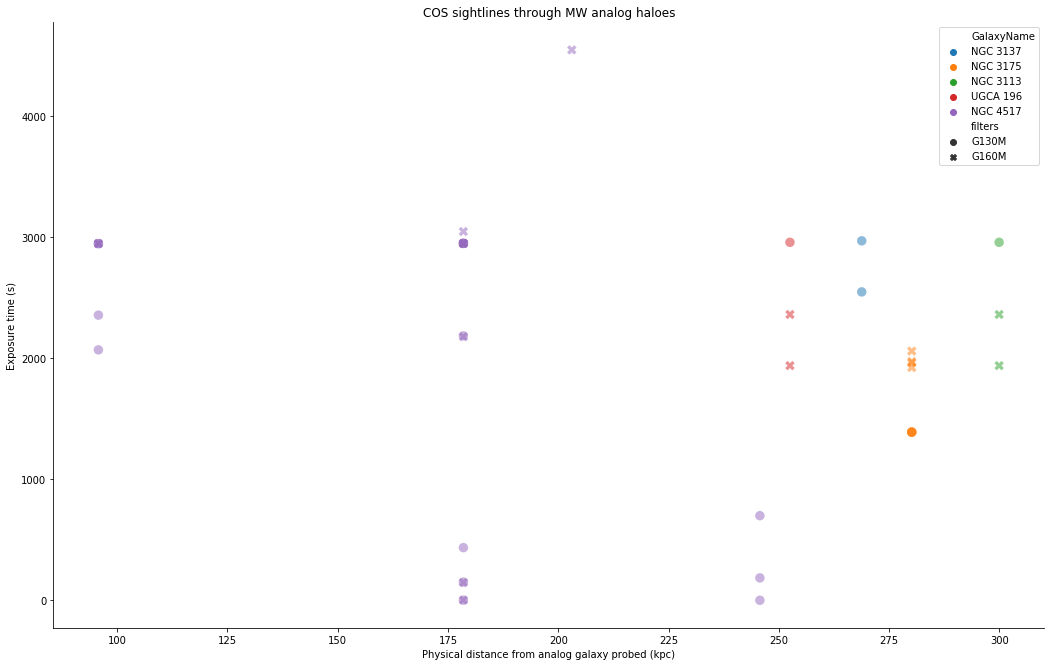

In [63]:
fg = sb.FacetGrid(data=sightlines, hue='GalaxyName', height=9,aspect=1.61)
fg.set(xscale="linear", yscale="linear")
fg = sb.scatterplot(x=sightlines['impact_param'], y=sightlines['t_exptime'],hue=sightlines['GalaxyName'],style=sightlines['filters'],s=90,edgecolor='none',alpha=0.5)

plt.title('COS sightlines through MW analog haloes')
plt.ylabel("Exposure time (s)")
plt.xlabel("Physical distance from analog galaxy probed (kpc)")
plt.show()

# COS ALFALFA analogs

In [64]:
alf = pd.read_csv("./tables/ALFALFA_catalog.csv") 

In [65]:
analogs = alf[(alf['Dist'] < 10.0) & (alf['W50'] > 150) & (alf['W50'] < 600) & (alf['Vhelio'] > 500) & (alf['Vhelio'] < 1000)]

In [66]:
analogs = alf[(alf['Dist'] < 10.0) & (alf['W50'] > 150) & (alf['W50'] < 600)]

In [67]:
#Kill M33
analogs = analogs[analogs['AGCNr'] != 1117]

In [68]:
analogs['RAhr_OC'] = analogs['RAdeg_OC']*24.0/360.0

In [69]:
analogs['RAhr_HI'] = analogs['RAdeg_HI']*24.0/360.0

In [70]:
analogs['useful COS data'] = np.nan

In [71]:
analogs['AGCNr'] = pd.to_numeric(analogs['AGCNr'])

In [72]:
analogs.loc[analogs['AGCNr'] == 1117,'useful COS data'] = 'yes, several'
analogs.loc[analogs['AGCNr'] == 1256,'useful COS data'] = 'no'
analogs.loc[analogs['AGCNr'] == 1913,'useful COS data'] = 'no'
analogs.loc[analogs['AGCNr'] == 5079,'useful COS data'] = 'one @260 kpc (both gratings)'
analogs.loc[analogs['AGCNr'] == 5840,'useful COS data'] = 'yes, one @37 kpc, just 130M, studied by Borthakur'
analogs.loc[analogs['AGCNr'] == 5721,'useful COS data'] = 'yes, lower exposure time, @42kpc, 160M only'
analogs.loc[analogs['AGCNr'] == 5850,'useful COS data'] = 'yes, several'
analogs.loc[analogs['AGCNr'] == 5882,'useful COS data'] = 'yes, several, mixed'
analogs.loc[analogs['AGCNr'] == 5960,'useful COS data'] = 'yes, one @191 kpc, both gratings'
analogs.loc[analogs['AGCNr'] == 6079,'useful COS data'] = 'yes, several, but only 130M, Bowen'
analogs.loc[analogs['AGCNr'] == 6272,'useful COS data'] = 'no'
analogs.loc[analogs['AGCNr'] == 7377,'useful COS data'] = 'yes, several, all 130M, except one'
analogs.loc[analogs['AGCNr'] == 6346,'useful COS data'] = 'yes, just G130M'
analogs.loc[analogs['AGCNr'] == 7440,'useful COS data'] = 'yes, just G130M, except one'
analogs.loc[analogs['AGCNr'] == 7694,'useful COS data'] = 'yes, two, both gratings'
analogs.loc[analogs['AGCNr'] == 7766,'useful COS data'] = 'yes, several'
analogs.loc[analogs['AGCNr'] == 8005,'useful COS data'] = 'no'
analogs.loc[analogs['AGCNr'] == 8062,'useful COS data'] = 'yes, G130M'
analogs.loc[analogs['AGCNr'] == 8271,'useful COS data'] = 'yes, limited'

In [73]:
list(analogs.columns)

['AGCNr',
 'Name',
 'RAdeg_HI',
 'DECdeg_HI',
 'RAdeg_OC',
 'DECdeg_OC',
 'Vhelio',
 'W50',
 'sigW',
 'W20',
 'HIflux',
 'sigflux',
 'SNR',
 'RMS',
 'Dist',
 'sigDist',
 'logMH',
 'siglogMH',
 'HIcode',
 'RAhr_OC',
 'RAhr_HI',
 'useful COS data']

In [74]:
analogs['coords'] = np.nan
for i in range(0,len(analogs['coords'])):
    analogs['coords'].iloc[i] = SkyCoord(ra=analogs['RAdeg_OC'].iloc[i], dec=analogs['DECdeg_OC'].iloc[i],frame='icrs',unit=(u.deg, u.deg))

In [75]:
len(relevant['filters'])

25

In [76]:
analogs

,AGCNr,Name,RAdeg_HI,DECdeg_HI,RAdeg_OC,DECdeg_OC,Vhelio,W50,sigW,W20,...,RMS,Dist,sigDist,logMH,siglogMH,HIcode,RAhr_OC,RAhr_HI,useful COS data,coords
3270,1256,N.672...,26.97417,27.42722,26.97458,27.43194,429,205,3,234,...,3.10,7.9,0.8,9.30,0.10,1,1.798305,1.798278,no,"<SkyCoord (ICRS): (ra, dec) in deg\n (26.97..."
4691,1913,N.925...,36.80833,33.57833,36.81958,33.57917,552,204,2,222,...,4.01,9.1,0.9,9.71,0.09,1,2.454639,2.453889,no,"<SkyCoord (ICRS): (ra, dec) in deg\n (36.81..."
9026,5079,N2903...,143.04416,21.50805,143.04001,21.50083,557,377,2,397,...,3.91,8.9,0.9,9.56,0.10,1,9.536001,9.536277,one @260 kpc (both gratings),"<SkyCoord (ICRS): (ra, dec) in deg\n (143.0..."
11625,5721,N3274...,158.07460,27.66750,158.07167,27.66861,541,160,2,174,...,2.51,6.5,0.6,8.70,0.10,1,10.538111,10.538307,"yes, lower exposure time, @42kpc, 160M only","<SkyCoord (ICRS): (ra, dec) in deg\n (158.0..."
12116,5840,N3344...,160.87915,24.92056,160.87915,24.92194,588,157,2,173,...,3.71,9.8,2.1,9.59,0.19,1,10.725277,10.725277,"yes, one @37 kpc, just 130M, studied by Borthakur","<SkyCoord (ICRS): (ra, dec) in deg\n (160.8..."
12139,5850,N3351...,160.98999,11.70417,160.98999,11.70333,777,270,2,283,...,2.95,9.3,0.9,9.03,0.10,1,10.732666,10.732666,"yes, several","<SkyCoord (ICRS): (ra, dec) in deg\n (160.9..."
12262,5882,N3368...,161.68916,11.82250,161.69041,11.81972,893,343,3,363,...,2.49,9.9,1.0,9.26,0.10,1,10.779361,10.779277,"yes, several, mixed","<SkyCoord (ICRS): (ra, dec) in deg\n (161.6..."
12519,5960,N3413...,162.84377,32.76305,162.83626,32.76639,642,156,2,179,...,2.06,8.9,4.1,8.45,0.40,1,10.855751,10.856251,"yes, one @191 kpc, both gratings","<SkyCoord (ICRS): (ra, dec) in deg\n (162.8..."
12947,6079,N3486...,165.09958,28.97306,165.10042,28.97528,677,202,3,224,...,2.69,9.7,4.1,9.41,0.37,1,11.006695,11.006639,"yes, several, but only 130M, Bowen","<SkyCoord (ICRS): (ra, dec) in deg\n (165.1..."
13730,6272,N3593...,168.65042,12.81417,168.65417,12.81722,631,254,7,282,...,2.14,8.9,1.8,8.33,0.18,1,11.243611,11.243361,no,"<SkyCoord (ICRS): (ra, dec) in deg\n (168.6..."


In [77]:
for i in range(0,len(analogs['Name'])):
    print(i,analogs['Name'].iloc[i])
    name = analogs['Name'].iloc[i]
    print(name)
    radius = str((206265*((300*10**3)/(analogs['Dist'].iloc[i]*10**6)))/3600.0)+ ' deg'
    observations = Observations.query_region(analogs['coords'].iloc[i],radius=radius)
    #print(observations)
    relevant = Table.to_pandas(observations[observations['instrument_name'] == 'COS/FUV'])
    for j in range(0,len(relevant['s_ra'])):
        print(analogs['Name'].iloc[i],relevant['s_ra'].iloc[j],relevant['s_dec'].iloc[j],relevant['filters'].iloc[j],relevant['t_exptime'].iloc[j],relevant['target_name'].iloc[j])
        sightlines = sightlines.append({'GalaxyName':analogs['Name'].iloc[i],'analog_ra':analogs['RAdeg_OC'].iloc[i],'analog_dec':analogs['DECdeg_OC'].iloc[i],'analog_vel':analogs['Vhelio'].iloc[i],'analog_dist':analogs['Dist'].iloc[i],'impact_param':np.nan,'s_ra':relevant['s_ra'].iloc[j],'s_dec':relevant['s_dec'].iloc[j],'filters':relevant['filters'].iloc[j],'t_exptime':relevant['t_exptime'].iloc[j],'proposal_pi':relevant['proposal_pi'].iloc[j],'target_name':relevant['target_name'].iloc[j]},ignore_index = True)

0 N.672...
N.672...
1 N.925...
N.925...
N.925... 35.3894528736 32.72329510315 G140L 331.0 HS0218+3229
N.925... 35.38945287356 32.72329510314 G140L 55.0 HS0218+3229
N.925... 35.3894528735 32.72329510313 G140L 7158.816 HS0218+3229
2 N2903...
N2903...
N2903... 144.00875 20.09525 G140L 900.192 J093602.10+200542.9
N2903... 144.0087833333 20.09526111111 G130M 1760.384 SDSS-J093602.10+200542.9
N2903... 144.0087833333 20.09526111111 G130M 2600.32 SDSS-J093602.10+200542.9
N2903... 144.0087833333 20.09526111111 G160M 2332.0 SDSS-J093602.10+200542.9
N2903... 144.0087833333 20.09526111111 G160M 2332.0 SDSS-J093602.10+200542.9
3 N3274...
N3274...
N3274... 158.11232 27.29868055556 G160M 1800.0 GP1032+2717
4 N3344...
N3344...
N3344... 160.6719595833 25.02301666667 G130M 5034.368 J104241.27+250122.8
N3344... 160.6719595833 25.02301666667 G130M 5034.368 J104241.27+250122.8
N3344... 162.1839583333 26.05368055556 G140L 568.064 MRK-727
5 N3351...
N3351...
N3351... 160.9898083333 11.70436666667 G130M 2227.

N4517... 189.454125 1.43525 G140L 6212.352 SDSSJ1237+0126
14 N4559...
N4559...
N4559... 189.0165 26.6933 G130M 2340.192 SDSSJ123604.02+264135.9
N4559... 189.0165 26.6933 G130M 1895.2 SDSSJ123604.02+264135.9
N4559... 189.0165 26.6933 G160M 3829.312 SDSSJ123604.02+264135.9
N4559... 189.0165 26.6933 G160M 2971.168 SDSSJ123604.02+264135.9
N4559... 190.3735333333 28.87001388889 G130M 980.192 SDSS-J124129.64+285212.0
N4559... 190.3735333333 28.87001388889 G130M 981.184 SDSS-J124129.64+285212.0
N4559... 190.3735333333 28.87001388889 G130M 1395.168 SDSS-J124129.64+285212.0
N4559... 190.3735333333 28.87001388889 G130M 1398.208 SDSS-J124129.64+285212.0
N4559... 189.1895333333 26.30102777778 G130M 7326.944 SDSSJ123645.51+261803.7
N4559... 189.1895333333 26.30102777778 G130M 7326.944 SDSSJ123645.51+261803.7
N4559... 188.9183458333 26.13844444444 G130M 9843.104 SDSSJ123540.42+260818.4
N4559... 188.9183458333 26.13844444444 G130M 9843.392 SDSSJ123540.42+260818.4
N4559... 188.9183458333 26.1384444444

In [78]:
sightlines

,GalaxyName,analog_ra,analog_dec,analog_coords,analog_vel,analog_dist,impact_param,s_ra,s_dec,filters,t_exptime,proposal_pi,target_name,coords
0,NGC 3137,10:09:05.6,-29:02:42,"<SkyCoord (ICRS): (ra, dec) in deg\n (152.2...",1114.3,14.7,268.801123,151.638667,-29.935222,G130M,2549.184,"Leitherer, Claus",NGC3125-1,"<SkyCoord (ICRS): (ra, dec) in deg\n (151.6..."
1,NGC 3137,10:09:05.6,-29:02:42,"<SkyCoord (ICRS): (ra, dec) in deg\n (152.2...",1114.3,14.7,268.801123,151.638667,-29.935222,G130M,2971.200,"Leitherer, Claus",NGC3125-1,"<SkyCoord (ICRS): (ra, dec) in deg\n (151.6..."
2,NGC 3175,10:14:43.7,-28:51:51,"<SkyCoord (ICRS): (ra, dec) in deg\n (153.6...",1081.1,14.7,280.140093,153.996833,-27.808000,G160M,1924.128,"Bregman, Joel N.",2MASS-J10155924-2748289,"<SkyCoord (ICRS): (ra, dec) in deg\n (153.9..."
3,NGC 3175,10:14:43.7,-28:51:51,"<SkyCoord (ICRS): (ra, dec) in deg\n (153.6...",1081.1,14.7,280.140093,153.996833,-27.808000,G160M,2060.064,"Bregman, Joel N.",2MASS-J10155924-2748289,"<SkyCoord (ICRS): (ra, dec) in deg\n (153.9..."
4,NGC 3175,10:14:43.7,-28:51:51,"<SkyCoord (ICRS): (ra, dec) in deg\n (153.6...",1081.1,14.7,280.140093,153.996833,-27.808000,G160M,1963.328,"Bregman, Joel N.",2MASS-J10155924-2748289,"<SkyCoord (ICRS): (ra, dec) in deg\n (153.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,N5014...,197.88,36.2814,NaN,1126.0,8.1,NaN,198.073958,35.255861,G130M,948.032,"Veilleux, Sylvain",QSO-B1309+3531,NaN
212,N5014...,197.88,36.2814,NaN,1126.0,8.1,NaN,198.073958,35.255861,G130M,195.000,"Veilleux, Sylvain",QSO-B1309+3531,NaN
213,N5014...,197.88,36.2814,NaN,1126.0,8.1,NaN,198.073958,35.255861,G130M,10.000,"Veilleux, Sylvain",QSO-B1309+3531,NaN
214,N5014...,197.88,36.2814,NaN,1126.0,8.1,NaN,198.490463,35.314711,G140L,2200.384,"Levesque, Emily",2MASX-J13135774+3518527,NaN


In [79]:
sightlines['coords'] = np.nan
sightlines['analog_coords'] = np.nan

for i in range(0,len(sightlines['GalaxyName'])):
    sightlines['coords'].iloc[i] = SkyCoord(ra=sightlines['s_ra'].iloc[i], dec=sightlines['s_dec'].iloc[i],frame='icrs',unit=(u.deg, u.deg))
    if(type(sightlines['analog_ra'].iloc[i]) == str):
        sightlines['analog_coords'].iloc[i] = SkyCoord(ra=sightlines['analog_ra'].iloc[i], dec=sightlines['analog_dec'].iloc[i],frame='icrs',unit=(u.hourangle, u.deg))
    else:
        sightlines['analog_coords'].iloc[i] = SkyCoord(ra=sightlines['analog_ra'].iloc[i], dec=sightlines['analog_dec'].iloc[i],frame='icrs',unit=(u.deg, u.deg))

    #sightlines['coords'].iloc[i] = SkyCoord(ra=sightlines['analog_ra'].iloc[i], dec=sightlines['analog_dec'].iloc[i],frame='icrs',unit=(u.hourangle, u.deg))
    c1 = sightlines['analog_coords'].iloc[i]
    c2 = sightlines['coords'].iloc[i]
    sep = c1.separation(c2)
    #impact in kpc
    #print(sep.radian)
    impact_param = sep.radian*sightlines['analog_dist'].iloc[i]*10**3
    sightlines['impact_param'].iloc[i] = impact_param             

In [80]:
for i in range(0,len(sightlines['GalaxyName'])):
    sightlines['GalaxyName'].iloc[i] = sightlines['GalaxyName'].iloc[i].replace('N','NGC ')
    sightlines['GalaxyName'].iloc[i] = sightlines['GalaxyName'].iloc[i].replace('NGC GC','NGC')
    sightlines['GalaxyName'].iloc[i] = sightlines['GalaxyName'].iloc[i].replace('NGC GC','NGC')
    sightlines['GalaxyName'].iloc[i] = sightlines['GalaxyName'].iloc[i].replace('NGC GC  ','NGC')

    sightlines['GalaxyName'].iloc[i] = sightlines['GalaxyName'].iloc[i].replace('...','     ')


In [81]:
sightlines = sightlines[sightlines['filters'] != 'G140L']

In [82]:
sightlines = sightlines.rename(columns={"GalaxyName": "Galaxy Name", "filters": "Filter"})

In [83]:
sightlines.sort_values('Galaxy Name', inplace=True)

In [84]:
sightlines.columns

Index(['Galaxy Name', 'analog_ra', 'analog_dec', 'analog_coords', 'analog_vel',
       'analog_dist', 'impact_param', 's_ra', 's_dec', 'Filter', 't_exptime',
       'proposal_pi', 'target_name', 'coords'],
      dtype='object')

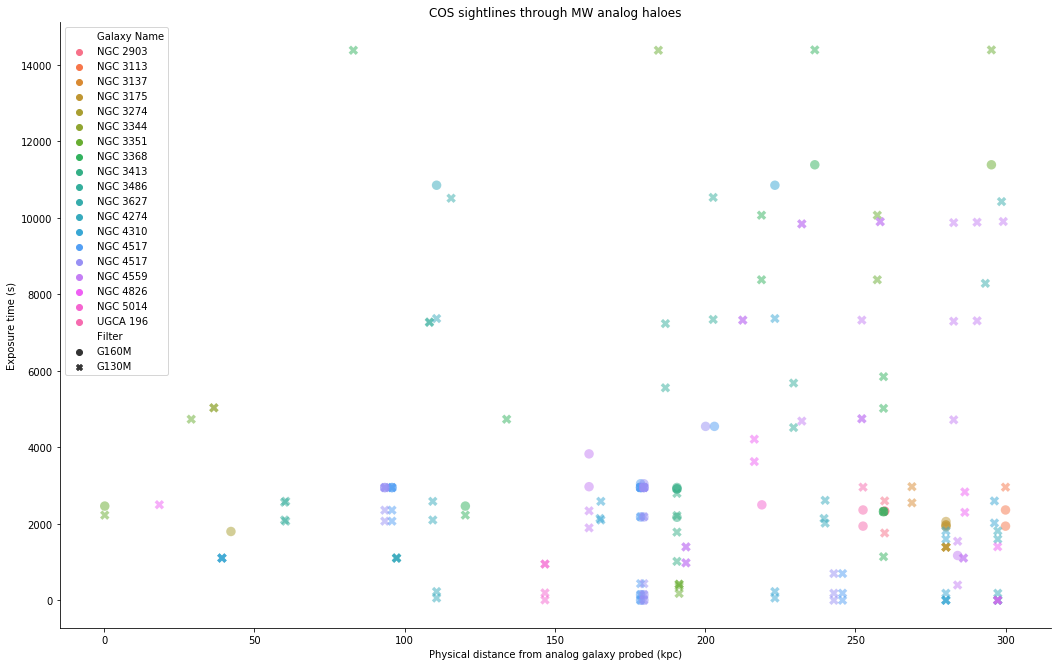

In [85]:
fg = sb.FacetGrid(data=sightlines, hue='Galaxy Name', height=9,aspect=1.61)
fg.set(xscale="linear", yscale="linear")
fg = sb.scatterplot(x=sightlines['impact_param'], y=sightlines['t_exptime'],hue=sightlines['Galaxy Name'],style=sightlines['Filter'],s=90,edgecolor='none',alpha=0.5)

plt.title('COS sightlines through MW analog haloes')
plt.ylabel("Exposure time (s)")
plt.xlabel("Physical distance from analog galaxy probed (kpc)")
plt.show()

In [86]:
sightlines['target_name'].unique()

array(['SDSS-J093602.10+200542.9', 'UVQSJ100826.52-273544.3', 'NGC3125-1',
       '2MASS-J10155924-2748289', 'GP1032+2717', 'J104241.27+250122.8',
       'SDSSJ104843.49+130605.9', 'M-95-YSC1', 'SDSSJ104816.25+120734.7',
       'IRAS10378+1109', 'J104709.83+130454.6', 'SDSSJ104709.83+130454.6',
       'J104335.86+115129.1', '2MASS-J10512569+1247462', 'PG1048+342',
       'SDSSJ110151.07+290803.6', 'SDSSJ110052.33+283801.2',
       'SDSSJ110307.57+291230.0', 'SDSSJ110612.25+292730.6',
       'SDSSJ110550.72+285130.8', 'SDSSJ110413.32+281530.3',
       'J112439.42+113117.2', 'IC-2779', 'J112632.91+120437.3',
       'QSO-B1215+303', 'PG1224+309', 'V-LM-COM', 'RBS1090', 'KISSR40',
       'WCOM', 'PG1218+304', 'RXJ1217.2+2749', 'SDSSJ123304.05-003134.1',
       'WD1229-013', 'GALEXASCJ123500.52-010854.8', 'RXJ1230.8+0115',
       'SDSSJ123700.28+255939.0', 'SDSSJ123521.58+255613.5',
       'SDSSJ123508.63+254453.1', 'KISSR108', 'NGC4670-OBJECT-1',
       'SDSSJ123817.19+254421.6', 'SDSSJ123

In [87]:
list(sightlines.columns)

['Galaxy Name',
 'analog_ra',
 'analog_dec',
 'analog_coords',
 'analog_vel',
 'analog_dist',
 'impact_param',
 's_ra',
 's_dec',
 'Filter',
 't_exptime',
 'proposal_pi',
 'target_name',
 'coords']

In [88]:
sightlines.groupby(['Galaxy Name','Filter','target_name']).sum()

analog_vel  analog_dist  \
Galaxy Name   Filter target_name                                         
NGC 2903      G130M  SDSS-J093602.10+200542.9      1114.0         17.8   
              G160M  SDSS-J093602.10+200542.9      1114.0         17.8   
NGC 3113      G130M  UVQSJ100826.52-273544.3       1081.2         14.4   
              G160M  UVQSJ100826.52-273544.3       2162.4         28.8   
NGC 3137      G130M  NGC3125-1                     2228.6         29.4   
...                                                   ...          ...   
NGC 4826      G130M  WD1249+182                    1224.0         13.2   
NGC 5014      G130M  QSO-B1309+3531                4504.0         32.4   
              G160M  SDSSJ131447.37+345259.8       1126.0          8.1   
UGCA 196      G130M  UVQSJ100826.52-273544.3        953.0         12.0   
              G160M  UVQSJ100826.52-273544.3       1906.0         24.0   

                                               impact_param        s_ra  \
Galaxy Name   Filter target_name                                          
NGC 2903      G130M  SDSS-J093602.10+200542.9    519.453986  288.017567   
              G160M  SDSS-J093602.10+200542.9    519.453986  288.017567   
NGC 3113      G130M  UVQSJ100826.52-273544.3     299.946912  152.110525   
              G160M  UVQSJ100826.52-273544.3     599.893823  304.221050   
NGC 3137      G130M  NGC3125-1                   537.602245  303.277333   
...                                                     ...         ...   
NGC 4826      G130M  WD1249+182                  892.008396  579.290456   
NGC 5014      G130M  QSO-B1309+3531              586.711054  792.295833   
              G160M  SDSSJ131447.37+345259.8     218.854621  198.697375   
UGCA 196      G130M  UVQSJ100826.52-273544.3     252.524928  152.110525   
              G160M  UVQSJ100826.52-273544.3     505.049856  304.221050   

                                                    s_dec  t_exptime  
Galaxy Name   Filter target_name                                      
NGC 2903      G130M  SDSS-J093602.10+200542.9   40.190522   4360.704  
              G160M  SDSS-J093602.10+200542.9   40.190522   4664.000  
NGC 3113      G130M  UVQSJ100826.52-273544.3   -27.595644   2959.000  
              G160M  UVQSJ100826.52-273544.3   -55.191289   4302.528  
NGC 3137      G130M  NGC3125-1                 -59.870444   5520.384  
...                                                   ...        ...  
NGC 4826      G130M  WD1249+182                 53.845718   1404.416  
NGC 5014      G130M  QSO-B1309+3531            141.023444   2101.064  
              G160M  SDSSJ131447.37+345259.8    34.883281   2496.672  
UGCA 196      G130M  UVQSJ100826.52-273544.3   -27.595644   2959.000  
              G160M  UVQSJ100826.52-273544.3   -55.191289   4302.528  

[88 rows x 6 columns]

In [89]:
sightlines_summed = sightlines.groupby(['Galaxy Name','Filter','target_name']).sum()

In [90]:
sightlines_summed = pd.DataFrame(sightlines_summed.to_records(), columns=sightlines_summed.index.names + list(sightlines_summed.columns))

In [91]:
sightlines_summed

,Galaxy Name,Filter,target_name,analog_vel,analog_dist,impact_param,s_ra,s_dec,t_exptime
0,NGC 2903,G130M,SDSS-J093602.10+200542.9,1114.0,17.8,519.453986,288.017567,40.190522,4360.704
1,NGC 2903,G160M,SDSS-J093602.10+200542.9,1114.0,17.8,519.453986,288.017567,40.190522,4664.000
2,NGC 3113,G130M,UVQSJ100826.52-273544.3,1081.2,14.4,299.946912,152.110525,-27.595644,2959.000
3,NGC 3113,G160M,UVQSJ100826.52-273544.3,2162.4,28.8,599.893823,304.221050,-55.191289,4302.528
4,NGC 3137,G130M,NGC3125-1,2228.6,29.4,537.602245,303.277333,-59.870444,5520.384
...,...,...,...,...,...,...,...,...,...
83,NGC 4826,G130M,WD1249+182,1224.0,13.2,892.008396,579.290456,53.845718,1404.416
84,NGC 5014,G130M,QSO-B1309+3531,4504.0,32.4,586.711054,792.295833,141.023444,2101.064
85,NGC 5014,G160M,SDSSJ131447.37+345259.8,1126.0,8.1,218.854621,198.697375,34.883281,2496.672
86,UGCA 196,G130M,UVQSJ100826.52-273544.3,953.0,12.0,252.524928,152.110525,-27.595644,2959.000


In [92]:
sightlines_summed[sightlines_summed['Galaxy Name'] == 'NGC 3113']

,Galaxy Name,Filter,target_name,analog_vel,analog_dist,impact_param,s_ra,s_dec,t_exptime
2,NGC 3113,G130M,UVQSJ100826.52-273544.3,1081.2,14.4,299.946912,152.110525,-27.595644,2959.000
3,NGC 3113,G160M,UVQSJ100826.52-273544.3,2162.4,28.8,599.893823,304.221050,-55.191289,4302.528


In [93]:
QSOS = Table.read('QSOALS_COS_new_sample.fits')

In [94]:
QSOS = Table.to_pandas(QSOS)

In [95]:
QSOS

,Number,Target Name,RA,DEC,Nexp,Target Category,Target Description,Alt Name,median S/N
0,1,b'QSO-B1411+4414',213.451370,44.003887,40,b'GALAXY',b'GALAXY;QSO',b' . . .',29.972260
1,2,b'SDSSJ102847.00+391800.5',157.195831,39.300140,5,b'UNIDENTIFIED',b'UNIDENTIFIED;ACCRETI',b' . . .',4.276515
2,3,b'RXSJ00508+3536',12.711437,35.611946,32,b'GALAXY',b'GALAXY;SEYFERT',b' . . .',17.291334
3,4,b'TON0133',192.751297,30.428289,10,b'GALAXY',b'GALAXY;QSO',b' . . .',10.030370
4,5,b'QSO-231145-141752',347.939423,-14.297806,4,b'GALAXY',b'GALAXY;LYMAN ALPHA C',b' . . .',2.101929
...,...,...,...,...,...,...,...,...,...
794,795,b'UVQSJ201710.20-451650.0',304.292328,-45.280613,16,b'GALAXY',b'GALAXY;QSO',b' . . .',8.749591
795,796,b'UVQSJ210956.11-504209.3',317.483643,-50.702744,16,b'GALAXY',b'GALAXY;QSO',b' . . .',6.853765
796,797,b'VV2006-J121613.6+524245',184.056885,52.712830,4,b'GALAXY',b'GALAXY;ACCRETION DIS',b' . . .',2.829045
797,798,b'SDSSJ150455.56+564920.3',226.231339,56.822140,7,b'GALAXY',b'GALAXY;QSO',b' . . .',9.216775


In [96]:
QSOS['Target Name'] = QSOS['Target Name'].str.decode("utf-8")

In [97]:
sightlines['target_name']

47     SDSS-J093602.10+200542.9
46     SDSS-J093602.10+200542.9
45     SDSS-J093602.10+200542.9
44     SDSS-J093602.10+200542.9
12      UVQSJ100826.52-273544.3
                 ...           
215     SDSSJ131447.37+345259.8
213              QSO-B1309+3531
15      UVQSJ100826.52-273544.3
13      UVQSJ100826.52-273544.3
14      UVQSJ100826.52-273544.3
Name: target_name, Length: 200, dtype: object

In [98]:
QSOS['coords'] = np.nan

for i in range(0,len(QSOS['Target Name'])):
    QSOS['coords'].iloc[i] = SkyCoord(ra=QSOS['RA'].iloc[i], dec=QSOS['DEC'].iloc[i],frame='icrs',unit=(u.deg, u.deg))

In [332]:
sightlines['S/N'] = np.nan
sightlines['match_sep'] = np.nan
sightlines['QSO_list_name'] = np.nan

for j in range(0,len(sightlines['target_name'])):
    min_sep = 100.0
    temp_sn = 0.0
    for k in range(0,len(QSOS['Target Name'])):
        #print(j,k)
        c1 = sightlines['coords'].iloc[j]
        c2 = QSOS['coords'].iloc[k]

        test_sep = c1.separation(c2)
        
        if(test_sep.arcmin < min_sep):
            min_sep = test_sep.arcmin
            temp_sn = QSOS['median S/N'].iloc[k]
            temp_name = QSOS['Target Name'].iloc[k]
    if (min_sep < 1.0):
        #print(min_sep,temp_sn,temp_name)
        sightlines['S/N'].iloc[j] = temp_sn
        sightlines['match_sep'].iloc[j] = min_sep
        sightlines['QSO_list_name'].iloc[j] = temp_name
        print('match',j,sightlines['Galaxy Name'].iloc[j],sightlines['QSO_list_name'].iloc[j],sightlines['target_name'].iloc[j],sightlines['match_sep'].iloc[j],sightlines['S/N'].iloc[j])
    else:
        print('no suitable match',j,k,sightlines['Galaxy Name'].iloc[j],sightlines['target_name'].iloc[j],sightlines['match_sep'].iloc[j])

match 0 798 NGC 2903      J093602.10+200542.9 SDSS-J093602.10+200542.9 0.0023674531718387852 3.543407917022705
match 1 798 NGC 2903      J093602.10+200542.9 SDSS-J093602.10+200542.9 0.0023674531718387852 3.543407917022705
match 2 798 NGC 2903      J093602.10+200542.9 SDSS-J093602.10+200542.9 0.0023674531718387852 3.543407917022705
match 3 798 NGC 2903      J093602.10+200542.9 SDSS-J093602.10+200542.9 0.0023674531718387852 3.543407917022705
no suitable match 4 798 NGC 3113 UVQSJ100826.52-273544.3 nan
no suitable match 5 798 NGC 3113 UVQSJ100826.52-273544.3 nan
no suitable match 6 798 NGC 3113 UVQSJ100826.52-273544.3 nan
no suitable match 7 798 NGC 3137 NGC3125-1 nan
no suitable match 8 798 NGC 3137 NGC3125-1 nan
match 9 798 NGC 3175 2MASS-J10155924-2748289 2MASS-J10155924-2748289 0.00038157023956034446 5.345252513885498
match 10 798 NGC 3175 2MASS-J10155924-2748289 2MASS-J10155924-2748289 0.00038157023956034446 5.345252513885498
match 11 798 NGC 3175 2MASS-J10155924-2748289 2MASS-J10155

match 96 798 NGC 4310      QSO-B1215+303 QSO-B1215+303 0.00011348890965687632 25.170623779296875
match 97 798 NGC 4310      QSO-B1215+303 QSO-B1215+303 0.00011348890965687632 25.170623779296875
no suitable match 98 798 NGC 4310      V-LM-COM nan
no suitable match 99 798 NGC 4310      V-LM-COM nan
no suitable match 100 798 NGC 4310      V-LM-COM nan
no suitable match 101 798 NGC 4310      PG1224+309 nan
no suitable match 102 798 NGC 4310      PG1224+309 nan
no suitable match 103 798 NGC 4310      PG1224+309 nan
no suitable match 104 798 NGC 4310      RXJ1217.2+2749 nan
no suitable match 105 798 NGC 4310      RXJ1217.2+2749 nan
match 106 798 NGC 4310      QSO-B1215+303 QSO-B1215+303 0.00011348890965687632 25.170623779296875
match 107 798 NGC 4517 SDSSJ123304.05-003134.1 SDSSJ123304.05-003134.1 0.0004017428741170886 10.95276927947998
match 108 798 NGC 4517 SDSSJ123304.05-003134.1 SDSSJ123304.05-003134.1 0.0004017428741170886 10.95276927947998
no suitable match 109 798 NGC 4517 WD1229-013 

match 192 798 NGC 5014      PG1309+355 QSO-B1309+3531 0.00011547680782307473 10.08258056640625
match 193 798 NGC 5014      PG1309+355 QSO-B1309+3531 0.00011547680782307473 10.08258056640625
match 194 798 NGC 5014      PG1309+355 QSO-B1309+3531 0.00011547680782307473 10.08258056640625
no suitable match 195 798 NGC 5014      SDSSJ131447.37+345259.8 nan
match 196 798 NGC 5014      PG1309+355 QSO-B1309+3531 0.00011547680782307473 10.08258056640625
no suitable match 197 798 UGCA 196 UVQSJ100826.52-273544.3 nan
no suitable match 198 798 UGCA 196 UVQSJ100826.52-273544.3 nan
no suitable match 199 798 UGCA 196 UVQSJ100826.52-273544.3 nan


In [333]:
sightlines[['Galaxy Name','target_name','QSO_list_name','match_sep','S/N']]

,Galaxy Name,target_name,QSO_list_name,match_sep,S/N
47,NGC 2903,SDSS-J093602.10+200542.9,J093602.10+200542.9,0.002367,3.543408
46,NGC 2903,SDSS-J093602.10+200542.9,J093602.10+200542.9,0.002367,3.543408
45,NGC 2903,SDSS-J093602.10+200542.9,J093602.10+200542.9,0.002367,3.543408
44,NGC 2903,SDSS-J093602.10+200542.9,J093602.10+200542.9,0.002367,3.543408
12,NGC 3113,UVQSJ100826.52-273544.3,NaN,NaN,NaN
...,...,...,...,...,...
215,NGC 5014,SDSSJ131447.37+345259.8,NaN,NaN,NaN
213,NGC 5014,QSO-B1309+3531,PG1309+355,0.000115,10.082581
15,UGCA 196,UVQSJ100826.52-273544.3,NaN,NaN,NaN
13,UGCA 196,UVQSJ100826.52-273544.3,NaN,NaN,NaN


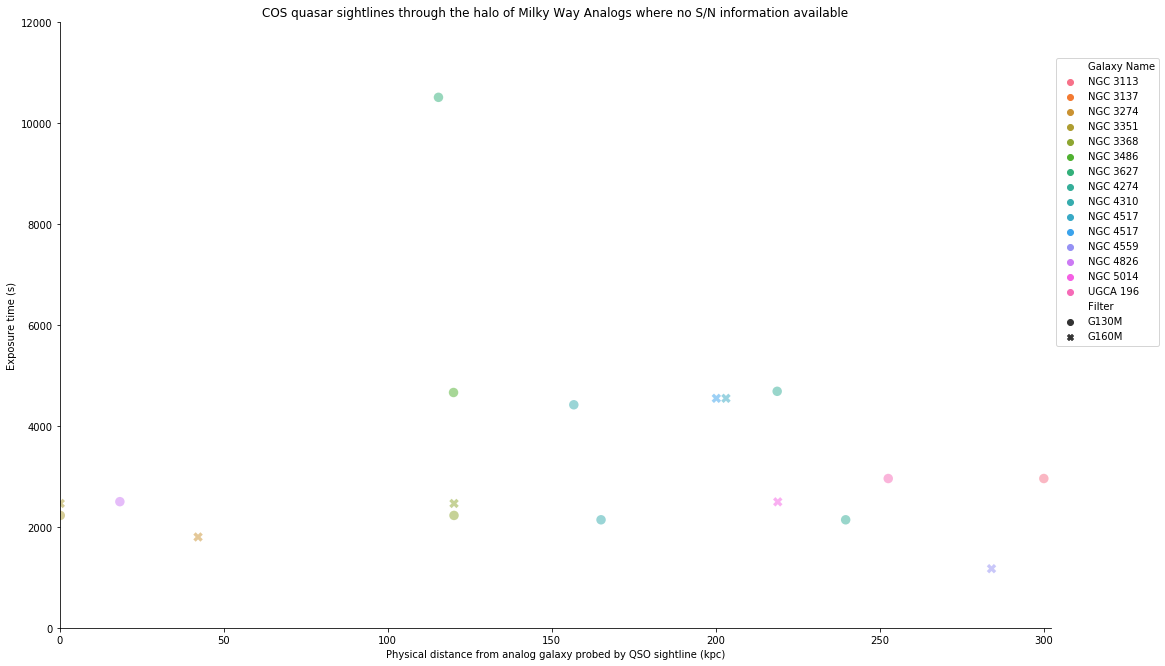

In [334]:
#Plot only those WITHOUT S/N but with summed exposure times for same QSO

plot_df = sightlines[sightlines['S/N'].isnull()]
plot_df = plot_df.groupby(['Galaxy Name','Filter','target_name']).sum()
plot_df = pd.DataFrame(plot_df.to_records(), columns=plot_df.index.names + list(plot_df.columns))

fg = sb.FacetGrid(data=sightlines, hue='Galaxy Name', height=9,aspect=1.61)
fg.set(xscale="linear", yscale="linear")
fg = sb.scatterplot(x=plot_df['impact_param'], y=plot_df['t_exptime'],hue=plot_df['Galaxy Name'],style=plot_df['Filter'],s=90,edgecolor='none',alpha=0.5)

plt.xlim(0,302)
plt.ylim(0,12000)

plt.title('COS quasar sightlines through the halo of Milky Way Analogs where no S/N information available')
plt.ylabel("Exposure time (s)")
plt.xlabel("Physical distance from analog galaxy probed by QSO sightline (kpc)")
plt.legend(bbox_to_anchor=(1, 0.95), loc='upper left', ncol=1)
plt.show()

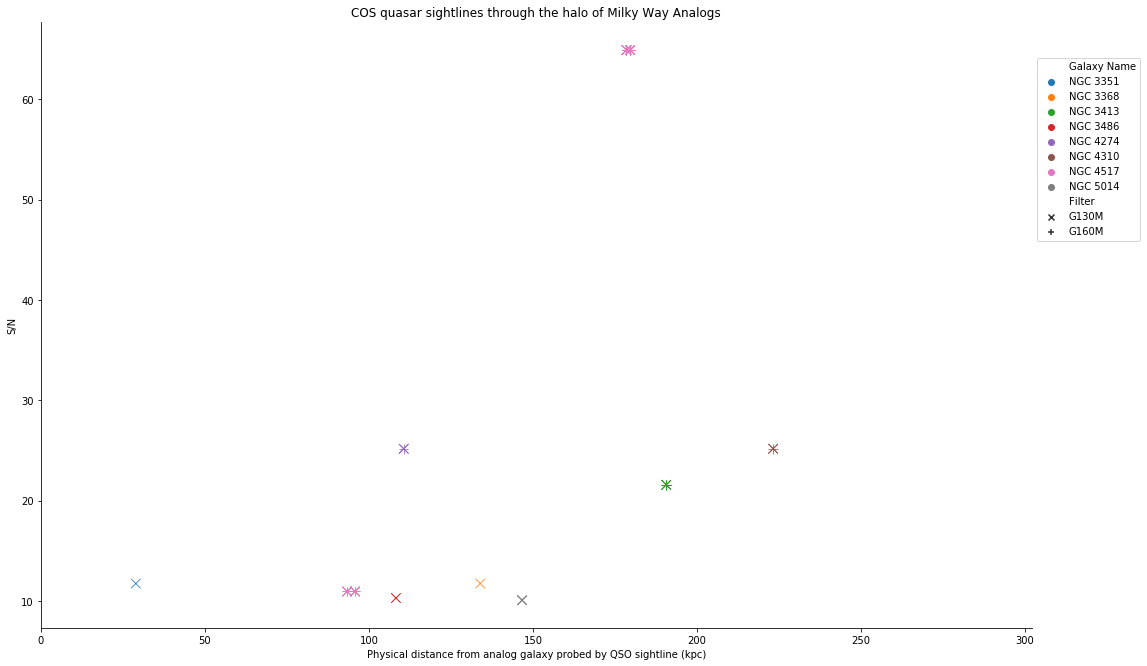

In [655]:
plot_df = sightlines[sightlines['S/N'] > 10]
#plot_df = plot_df[plot_df['n_sats'] < 20]

fg = sb.FacetGrid(data=sightlines, hue='Galaxy Name', height=9,aspect=1.61)
fg.set(xscale="linear", yscale="linear")
fg = sb.scatterplot(x=plot_df['impact_param'], y=plot_df['S/N'],hue=plot_df['Galaxy Name'],style=plot_df['Filter'],markers={'G130M':'x','G160M':'+'},s=90,edgecolor='none',alpha=1.0)

plt.xlim(0,302)
#plt.ylim(0,70)

plt.title('COS quasar sightlines through the halo of Milky Way Analogs')
plt.ylabel("S/N")
plt.xlabel("Physical distance from analog galaxy probed by QSO sightline (kpc)")
plt.legend(bbox_to_anchor=(1, 0.95), loc='upper left', ncol=1)
plt.show()

# Which have or don't have suspected gas-containing dwarf populations in ALFALFA

In [336]:
alf

,AGCNr,Name,RAdeg_HI,DECdeg_HI,RAdeg_OC,DECdeg_OC,Vhelio,W50,sigW,W20,HIflux,sigflux,SNR,RMS,Dist,sigDist,logMH,siglogMH,HIcode,coords
0,105367,........,0.00167,5.44333,0.00333,5.44250,11983,274,39,281,1.14,0.08,8.1,1.91,166.0,2.3,9.87,0.05,1,"<SkyCoord (ICRS): (ra, dec) in deg\n (0.001..."
1,333313,........,0.00375,24.90889,359.99750,24.90750,11181,313,20,333,1.80,0.09,11.3,2.02,154.8,2.3,10.01,0.05,1,"<SkyCoord (ICRS): (ra, dec) in deg\n (0.003..."
2,331060,478-009b,0.01042,23.08472,0.01417,23.08750,4463,160,4,184,1.96,0.07,14.7,2.35,50.6,10.4,9.07,0.18,1,"<SkyCoord (ICRS): (ra, dec) in deg\n (0.010..."
3,331061,456-013.,0.01042,15.87222,0.00875,15.88167,6007,260,45,268,1.13,0.09,6.5,2.40,85.2,2.4,9.29,0.06,1,"<SkyCoord (ICRS): (ra, dec) in deg\n (0.010..."
4,104570,........,0.00667,32.70834,0.00500,32.71028,10614,245,6,250,0.86,0.07,6.6,1.86,147.0,2.3,9.64,0.06,1,"<SkyCoord (ICRS): (ra, dec) in deg\n (0.006..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31497,331054,517-008.,359.92041,34.34722,359.92877,34.34528,4900,84,14,152,2.24,0.07,23.3,2.33,69.5,2.3,9.41,0.05,1,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.9..."
31498,331052,Eder.Dw.,359.93500,27.25778,359.93750,27.25389,4692,61,2,75,0.58,0.04,7.6,1.95,66.5,2.3,8.78,0.06,1,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.9..."
31499,334869,........,359.96167,21.55028,359.96042,21.55611,10432,171,9,185,0.97,0.07,7.7,2.14,144.0,2.3,9.68,0.06,1,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.9..."
31500,332965,........,359.98166,5.23889,359.97873,5.23889,3038,124,9,158,1.18,0.06,13.4,1.76,42.8,2.3,8.71,0.07,1,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.9..."


In [337]:
sightlines

,Galaxy Name,analog_ra,analog_dec,analog_coords,analog_vel,analog_dist,impact_param,s_ra,s_dec,Filter,t_exptime,proposal_pi,target_name,coords,S/N,match_sep,QSO_list_name,n_sats
47,NGC 2903,143.04,21.5008,"<SkyCoord (ICRS): (ra, dec) in deg\n (143.0...",557.0,8.9,259.726993,144.008783,20.095261,G160M,2332.000,"Arav, Nahum",SDSS-J093602.10+200542.9,"<SkyCoord (ICRS): (ra, dec) in deg\n (144.0...",3.543408,0.002367,J093602.10+200542.9,2.0
46,NGC 2903,143.04,21.5008,"<SkyCoord (ICRS): (ra, dec) in deg\n (143.0...",557.0,8.9,259.726993,144.008783,20.095261,G160M,2332.000,"Arav, Nahum",SDSS-J093602.10+200542.9,"<SkyCoord (ICRS): (ra, dec) in deg\n (144.0...",3.543408,0.002367,J093602.10+200542.9,2.0
45,NGC 2903,143.04,21.5008,"<SkyCoord (ICRS): (ra, dec) in deg\n (143.0...",557.0,8.9,259.726993,144.008783,20.095261,G130M,2600.320,"Arav, Nahum",SDSS-J093602.10+200542.9,"<SkyCoord (ICRS): (ra, dec) in deg\n (144.0...",3.543408,0.002367,J093602.10+200542.9,2.0
44,NGC 2903,143.04,21.5008,"<SkyCoord (ICRS): (ra, dec) in deg\n (143.0...",557.0,8.9,259.726993,144.008783,20.095261,G130M,1760.384,"Arav, Nahum",SDSS-J093602.10+200542.9,"<SkyCoord (ICRS): (ra, dec) in deg\n (144.0...",3.543408,0.002367,J093602.10+200542.9,2.0
12,NGC 3113,10:04:37.6,-28:26:29,"<SkyCoord (ICRS): (ra, dec) in deg\n (151.1...",1081.2,14.4,299.946912,152.110525,-27.595644,G160M,1940.000,"Burchett, Joseph Neil",UVQSJ100826.52-273544.3,"<SkyCoord (ICRS): (ra, dec) in deg\n (152.1...",NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,NGC 5014,197.88,36.2814,"<SkyCoord (ICRS): (ra, dec) in deg\n (197.8...",1126.0,8.1,218.854621,198.697375,34.883281,G160M,2496.672,"Stark, Daniel P.",SDSSJ131447.37+345259.8,"<SkyCoord (ICRS): (ra, dec) in deg\n (198.6...",NaN,NaN,NaN,6.0
213,NGC 5014,197.88,36.2814,"<SkyCoord (ICRS): (ra, dec) in deg\n (197.8...",1126.0,8.1,146.677763,198.073958,35.255861,G130M,10.000,"Veilleux, Sylvain",QSO-B1309+3531,"<SkyCoord (ICRS): (ra, dec) in deg\n (198.0...",10.082581,0.000115,PG1309+355,8.0
15,UGCA 196,10:03:42.5,-27:00:21,"<SkyCoord (ICRS): (ra, dec) in deg\n (150.9...",953.0,12.0,252.524928,152.110525,-27.595644,G160M,1940.000,"Burchett, Joseph Neil",UVQSJ100826.52-273544.3,"<SkyCoord (ICRS): (ra, dec) in deg\n (152.1...",NaN,NaN,NaN,0.0
13,UGCA 196,10:03:42.5,-27:00:21,"<SkyCoord (ICRS): (ra, dec) in deg\n (150.9...",953.0,12.0,252.524928,152.110525,-27.595644,G130M,2959.000,"Burchett, Joseph Neil",UVQSJ100826.52-273544.3,"<SkyCoord (ICRS): (ra, dec) in deg\n (152.1...",NaN,NaN,NaN,0.0


In [666]:
alf['HI_coords'] = np.nan
alf['OC_coords'] = np.nan

for i in range(0,len(alf['AGCNr'])):
    alf['HI_coords'].iloc[i] = SkyCoord(ra=alf['RAdeg_HI'].iloc[i], dec=alf['DECdeg_HI'].iloc[i],frame='icrs',unit=(u.deg, u.deg))
    alf['OC_coords'].iloc[i] = SkyCoord(ra=alf['RAdeg_OC'].iloc[i], dec=alf['DECdeg_OC'].iloc[i],frame='icrs',unit=(u.deg, u.deg))


In [667]:
alf.columns

Index(['AGCNr', 'Name', 'RAdeg_HI', 'DECdeg_HI', 'RAdeg_OC', 'DECdeg_OC',
       'Vhelio', 'W50', 'sigW', 'W20', 'HIflux', 'sigflux', 'SNR', 'RMS',
       'Dist', 'sigDist', 'logMH', 'siglogMH', 'HIcode', 'coords', ')C_coords',
       'OC_coords'],
      dtype='object')

In [669]:
analogs['HI_coords'] = np.nan
analogs['OC_coords'] = np.nan

for i in range(0,len(analogs['AGCNr'])):
    analogs['HI_coords'].iloc[i] = SkyCoord(ra=analogs['RAdeg_HI'].iloc[i], dec=analogs['DECdeg_HI'].iloc[i],frame='icrs',unit=(u.deg, u.deg))
    analogs['OC_coords'].iloc[i] = SkyCoord(ra=analogs['RAdeg_OC'].iloc[i], dec=analogs['DECdeg_OC'].iloc[i],frame='icrs',unit=(u.deg, u.deg))

In [724]:
alf

,AGCNr,Name,RAdeg_HI,DECdeg_HI,RAdeg_OC,DECdeg_OC,Vhelio,W50,sigW,W20,...,SNR,RMS,Dist,sigDist,logMH,siglogMH,HIcode,coords,)C_coords,OC_coords
0,105367,........,0.00167,5.44333,0.00333,5.44250,11983,274,39,281,...,8.1,1.91,166.0,2.3,9.87,0.05,1,"<SkyCoord (ICRS): (ra, dec) in deg\n (0.001...",NaN,"<SkyCoord (ICRS): (ra, dec) in deg\n (0.003..."
1,333313,........,0.00375,24.90889,359.99750,24.90750,11181,313,20,333,...,11.3,2.02,154.8,2.3,10.01,0.05,1,"<SkyCoord (ICRS): (ra, dec) in deg\n (0.003...",NaN,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.9..."
2,331060,478-009b,0.01042,23.08472,0.01417,23.08750,4463,160,4,184,...,14.7,2.35,50.6,10.4,9.07,0.18,1,"<SkyCoord (ICRS): (ra, dec) in deg\n (0.010...",NaN,"<SkyCoord (ICRS): (ra, dec) in deg\n (0.014..."
3,331061,456-013.,0.01042,15.87222,0.00875,15.88167,6007,260,45,268,...,6.5,2.40,85.2,2.4,9.29,0.06,1,"<SkyCoord (ICRS): (ra, dec) in deg\n (0.010...",NaN,"<SkyCoord (ICRS): (ra, dec) in deg\n (0.008..."
4,104570,........,0.00667,32.70834,0.00500,32.71028,10614,245,6,250,...,6.6,1.86,147.0,2.3,9.64,0.06,1,"<SkyCoord (ICRS): (ra, dec) in deg\n (0.006...",NaN,"<SkyCoord (ICRS): (ra, dec) in deg\n (0.005..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31497,331054,517-008.,359.92041,34.34722,359.92877,34.34528,4900,84,14,152,...,23.3,2.33,69.5,2.3,9.41,0.05,1,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.9...",NaN,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.9..."
31498,331052,Eder.Dw.,359.93500,27.25778,359.93750,27.25389,4692,61,2,75,...,7.6,1.95,66.5,2.3,8.78,0.06,1,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.9...",NaN,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.9..."
31499,334869,........,359.96167,21.55028,359.96042,21.55611,10432,171,9,185,...,7.7,2.14,144.0,2.3,9.68,0.06,1,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.9...",NaN,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.9..."
31500,332965,........,359.98166,5.23889,359.97873,5.23889,3038,124,9,158,...,13.4,1.76,42.8,2.3,8.71,0.07,1,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.9...",NaN,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.9..."


In [741]:
alf.columns

Index(['AGCNr', 'Name', 'RAdeg_HI', 'DECdeg_HI', 'RAdeg_OC', 'DECdeg_OC',
       'Vhelio', 'W50', 'sigW', 'W20', 'HIflux', 'sigflux', 'SNR', 'RMS',
       'Dist', 'sigDist', 'logMH', 'siglogMH', 'HIcode', 'coords', ')C_coords',
       'OC_coords'],
      dtype='object')

In [759]:
satellites = pd.DataFrame()
#satellites['host_analog'] = np.nan

analogs['n_sats'] = np.nan

projected_sep_threshold = 300.0

for i in range(0,len(analogs['Name'])):
    n_sats = 0
    for j in range(0,len(alf['AGCNr'])):
        if(abs(analogs['Vhelio'].iloc[i] - alf['Vhelio'].iloc[j]) < 300.0):
            c1 = analogs['OC_coords'].iloc[i]
            c2 = alf['OC_coords'].iloc[j]
            sep = c1.separation(c2)
            projected_sep = sep.radian* analogs['Dist'].iloc[i]*10**3
            if(projected_sep < projected_sep_threshold):
                n_sats = n_sats + 1
                #print(Ned.query_region(c2, radius=10 * u.arcmin))
                add_sat = pd.DataFrame({'host_analog':analogs['Name'].iloc[i],'AGCNr':alf['AGCNr'].iloc[j],'Name':alf['Name'].iloc[j],'RAdeg_HI':alf['RAdeg_HI'].iloc[j],'DECdeg_HI':alf['DECdeg_HI'].iloc[j],'RAdeg_OC':alf['RAdeg_OC'].iloc[j],'DECdeg_OC':alf['DECdeg_OC'].iloc[j],'W50':alf['W50'].iloc[j],'logMH':alf['logMH'].iloc[j],'Dist':alf['Dist'].iloc[j],'Vhelio':alf['Vhelio'].iloc[j]}, index=[0])
                satellites = pd.concat([satellites,add_sat])
    print(i,analogs['Name'].iloc[i],n_sats)
    analogs['n_sats'].iloc[i] = n_sats

0 N.672... 7
1 N.925... 2
2 N2903... 2
3 N3274... 4
4 N3344... 1
5 N3351... 6
6 N3368... 6
7 N3413... 1
8 N3486... 9
9 N3593... 7
10 N3627... 9
11 N4274... 9
12 N4310... 10
13 N4517... 6
14 N4559... 12
15 N4747... 5
16 N4826... 4
17 N5014... 8


In [761]:
satellites

,host_analog,AGCNr,Name,RAdeg_HI,DECdeg_HI,RAdeg_OC,DECdeg_OC,W50,logMH,Dist,Vhelio
0,N.672...,112521,........,25.27667,27.31750,25.28167,27.32333,26,6.85,6.6,274
0,N.672...,110482,KK.13...,25.57000,26.36611,25.57250,26.36667,30,7.28,7.8,357
0,N.672...,111945,KK.14...,26.17667,27.28806,26.17833,27.28861,36,7.48,6.4,423
0,N.672...,111946,KK.15...,26.67625,26.80167,26.67583,26.80139,21,7.16,9.0,367
0,N.672...,1249,I1727...,26.88292,27.33972,26.87458,27.33278,129,9.14,7.5,336
...,...,...,...,...,...,...,...,...,...,...,...
0,N5014...,8271,N5014...,197.85291,36.17500,197.88000,36.28139,168,7.29,8.1,1126
0,N5014...,728713,........,197.93416,35.96500,197.92917,35.96056,31,7.67,20.5,1128
0,N5014...,8303,189-042.,198.33665,36.18417,198.32416,36.21417,79,8.69,16.0,945
0,N5014...,239140,........,198.65001,35.84639,198.65083,35.84917,31,7.51,20.7,1138


In [764]:
satellites['OC_coords'] = np.nan

for i in range(0,len(satellites['Name'])):

    satellites['OC_coords'].iloc[i] = SkyCoord(ra=satellites['RAdeg_OC'].iloc[i], dec=satellites['DECdeg_OC'].iloc[i],frame='icrs',unit=(u.deg, u.deg))

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [765]:
result_table = pd.DataFrame()

for i in range(0,len(satellites['Name'])):
    coords = satellites['OC_coords'].iloc[i]
    result_table = pd.concat([result_table,Table.to_pandas(Ned.query_region(coords, radius=1*u.arcmin))])

In [766]:
result_table.reset_index(inplace=True)
str_df = result_table.select_dtypes([np.object])
str_df = str_df.stack().str.decode('utf-8').unstack()
for col in str_df:
    result_table[col] = str_df[col]
    
result_table = result_table[result_table['Type'] == 'G']

In [767]:
result_table.columns

Index(['index', 'No.', 'Object Name', 'RA', 'DEC', 'Type', 'Velocity',
       'Redshift', 'Redshift Flag', 'Magnitude and Filter', 'Separation',
       'References', 'Notes', 'Photometry Points', 'Positions',
       'Redshift Points', 'Diameter Points', 'Associations'],
      dtype='object')

In [768]:
result_table

,index,No.,Object Name,RA,DEC,Type,Velocity,Redshift,Redshift Flag,Magnitude and Filter,Separation,References,Notes,Photometry Points,Positions,Redshift Points,Diameter Points,Associations
12,12,13,AGC 112521,25.28333,27.32222,G,274.0,0.000914,,17.8B,0.110,21,1,6,14,8,0,0
24,5,6,AGC 110482,25.57250,26.36667,G,357.0,0.001191,,16.6,0.001,35,1,6,13,8,0,0
41,13,14,AGC 111945,26.17833,27.28861,G,423.0,0.001411,,17.1,0.000,37,1,4,12,8,0,0
54,9,10,GALEXMSC J014642.06+264808.9,26.67583,26.80139,G,366.0,0.001221,,18.5,0.000,32,1,7,16,9,0,0
109,51,52,IC 1727,26.87454,27.33336,G,345.0,0.001151,,12.07,0.035,187,9,62,23,15,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4877,18,19,SDSS J131448.24+345252.9,198.70103,34.88138,G,NaN,NaN,,19.8g,0.035,0,0,15,1,0,4,1
4878,19,20,UGC 08323,198.70126,34.88091,G,863.0,0.002879,,14.3,0.005,93,2,73,15,11,5,0
4882,23,24,SDSS J131448.59+345250.3,198.70249,34.88064,G,NaN,NaN,,20.3g,0.062,1,0,15,1,0,4,1
4885,26,27,SDSS J131449.40+345243.7,198.70586,34.87882,G,NaN,NaN,,20.5g,0.257,0,0,15,1,0,4,0


In [736]:
analogs.columns

Index(['AGCNr', 'Name', 'RAdeg_HI', 'DECdeg_HI', 'RAdeg_OC', 'DECdeg_OC',
       'Vhelio', 'W50', 'sigW', 'W20', 'HIflux', 'sigflux', 'SNR', 'RMS',
       'Dist', 'sigDist', 'logMH', 'siglogMH', 'HIcode', 'RAhr_OC', 'RAhr_HI',
       'useful COS data', 'coords', 'HI_coords', 'OC_coords', 'n_sats'],
      dtype='object')

In [737]:
sightlines.columns

Index(['Galaxy Name', 'analog_ra', 'analog_dec', 'analog_coords', 'analog_vel',
       'analog_dist', 'impact_param', 's_ra', 's_dec', 'Filter', 't_exptime',
       'proposal_pi', 'target_name', 'coords', 'S/N', 'match_sep',
       'QSO_list_name', 'n_sats'],
      dtype='object')

In [769]:
sightlines

,Galaxy Name,analog_ra,analog_dec,analog_coords,analog_vel,analog_dist,impact_param,s_ra,s_dec,Filter,t_exptime,proposal_pi,target_name,coords,S/N,match_sep,QSO_list_name,n_sats
47,NGC 2903,143.04,21.5008,"<SkyCoord (ICRS): (ra, dec) in deg\n (143.0...",557.0,8.9,259.726993,144.008783,20.095261,G160M,2332.000,"Arav, Nahum",SDSS-J093602.10+200542.9,"<SkyCoord (ICRS): (ra, dec) in deg\n (144.0...",3.543408,0.002367,J093602.10+200542.9,2.0
46,NGC 2903,143.04,21.5008,"<SkyCoord (ICRS): (ra, dec) in deg\n (143.0...",557.0,8.9,259.726993,144.008783,20.095261,G160M,2332.000,"Arav, Nahum",SDSS-J093602.10+200542.9,"<SkyCoord (ICRS): (ra, dec) in deg\n (144.0...",3.543408,0.002367,J093602.10+200542.9,2.0
45,NGC 2903,143.04,21.5008,"<SkyCoord (ICRS): (ra, dec) in deg\n (143.0...",557.0,8.9,259.726993,144.008783,20.095261,G130M,2600.320,"Arav, Nahum",SDSS-J093602.10+200542.9,"<SkyCoord (ICRS): (ra, dec) in deg\n (144.0...",3.543408,0.002367,J093602.10+200542.9,2.0
44,NGC 2903,143.04,21.5008,"<SkyCoord (ICRS): (ra, dec) in deg\n (143.0...",557.0,8.9,259.726993,144.008783,20.095261,G130M,1760.384,"Arav, Nahum",SDSS-J093602.10+200542.9,"<SkyCoord (ICRS): (ra, dec) in deg\n (144.0...",3.543408,0.002367,J093602.10+200542.9,2.0
12,NGC 3113,10:04:37.6,-28:26:29,"<SkyCoord (ICRS): (ra, dec) in deg\n (151.1...",1081.2,14.4,299.946912,152.110525,-27.595644,G160M,1940.000,"Burchett, Joseph Neil",UVQSJ100826.52-273544.3,"<SkyCoord (ICRS): (ra, dec) in deg\n (152.1...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,NGC 5014,197.88,36.2814,"<SkyCoord (ICRS): (ra, dec) in deg\n (197.8...",1126.0,8.1,218.854621,198.697375,34.883281,G160M,2496.672,"Stark, Daniel P.",SDSSJ131447.37+345259.8,"<SkyCoord (ICRS): (ra, dec) in deg\n (198.6...",NaN,NaN,NaN,NaN
213,NGC 5014,197.88,36.2814,"<SkyCoord (ICRS): (ra, dec) in deg\n (197.8...",1126.0,8.1,146.677763,198.073958,35.255861,G130M,10.000,"Veilleux, Sylvain",QSO-B1309+3531,"<SkyCoord (ICRS): (ra, dec) in deg\n (198.0...",10.082581,0.000115,PG1309+355,NaN
15,UGCA 196,10:03:42.5,-27:00:21,"<SkyCoord (ICRS): (ra, dec) in deg\n (150.9...",953.0,12.0,252.524928,152.110525,-27.595644,G160M,1940.000,"Burchett, Joseph Neil",UVQSJ100826.52-273544.3,"<SkyCoord (ICRS): (ra, dec) in deg\n (152.1...",NaN,NaN,NaN,NaN
13,UGCA 196,10:03:42.5,-27:00:21,"<SkyCoord (ICRS): (ra, dec) in deg\n (150.9...",953.0,12.0,252.524928,152.110525,-27.595644,G130M,2959.000,"Burchett, Joseph Neil",UVQSJ100826.52-273544.3,"<SkyCoord (ICRS): (ra, dec) in deg\n (152.1...",NaN,NaN,NaN,NaN


In [770]:
analogs.columns

Index(['AGCNr', 'Name', 'RAdeg_HI', 'DECdeg_HI', 'RAdeg_OC', 'DECdeg_OC',
       'Vhelio', 'W50', 'sigW', 'W20', 'HIflux', 'sigflux', 'SNR', 'RMS',
       'Dist', 'sigDist', 'logMH', 'siglogMH', 'HIcode', 'RAhr_OC', 'RAhr_HI',
       'useful COS data', 'coords', 'HI_coords', 'OC_coords', 'n_sats'],
      dtype='object')

In [771]:
#add number of satellites to sightlines data
for i in range(0,len(sightlines['Galaxy Name'])):
    for j in range(0,len(analogs['Name'])):
        name = analogs['Name'].iloc[j].replace('.','')
        name = name.replace('N','NGC ')
        if(sightlines['Galaxy Name'].iloc[i] == name):
            sightlines['n_sats'].iloc[i] = analogs['n_sats'].iloc[j]

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [772]:
analogs[['Name','n_sats']]

,Name,n_sats
3270,N.672...,7.0
4691,N.925...,2.0
9026,N2903...,2.0
11625,N3274...,4.0
12116,N3344...,1.0
12139,N3351...,6.0
12262,N3368...,6.0
12519,N3413...,1.0
12947,N3486...,9.0
13730,N3593...,7.0


In [775]:
sightlines[['Galaxy Name','target_name','n_sats','S/N']]

,Galaxy Name,target_name,n_sats,S/N
47,NGC 2903,SDSS-J093602.10+200542.9,2.0,3.543408
46,NGC 2903,SDSS-J093602.10+200542.9,2.0,3.543408
45,NGC 2903,SDSS-J093602.10+200542.9,2.0,3.543408
44,NGC 2903,SDSS-J093602.10+200542.9,2.0,3.543408
12,NGC 3113,UVQSJ100826.52-273544.3,NaN,NaN
...,...,...,...,...
215,NGC 5014,SDSSJ131447.37+345259.8,8.0,NaN
213,NGC 5014,QSO-B1309+3531,8.0,10.082581
15,UGCA 196,UVQSJ100826.52-273544.3,NaN,NaN
13,UGCA 196,UVQSJ100826.52-273544.3,NaN,NaN


In [691]:
ned_d = pd.read_csv("NED29.10.3-D-16.1.0-20190919.csv") 

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (1,2,4,5,6,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [721]:
ned_d

,Exclusion Code,D,G,Galaxy ID,m-M,err,D (Mpc),Method,REFCODE,SN ID,redshift (z),Hubble const.,Adopted LMC modulus,Date (Yr. - 1980),Notes
0,FRN,Dist. 1 to 272382,Gal. 1 to 147439,NAME,m-M,err,D [Mpc],Indicator,REFCODE,SN ID,NaN,Hubble cont.,LMC m-M assumed,Yr - 1980,NOTES
1,N,1,1,SDSS-II SN 13651,41.64,0.17,1700,SNIa SDSS,2018PASP..130f4002S,SDSS-II SN 13651,0.249917,70,NaN,34,SDSS CAND. AGN; MLCS2K2
2,N,2,1,SDSS-II SN 13651,42.1,0.21,2110,SNIa SDSS,2018PASP..130f4002S,SDSS-II SN 13651,0.249917,70,NaN,34,SDSS CAND. AGN; SALT 2
3,N,999999,1,SDSS-II SN 13651,41.64,0.17,1700,SNIa SDSS,2018PASP..130f4002S,SDSS-II SN 13651,0.249917,70,NaN,34,"SDSS-II SN 13651, SDSS CAND. AGN; MLCS2K2"
4,N,999999,1,SDSS-II SN 13651,42.1,0.21,2110,SNIa SDSS,2018PASP..130f4002S,SDSS-II SN 13651,0.249917,70,NaN,34,"SDSS-II SN 13651, SDSS CAND. AGN; SALT 2"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326615,N,272155,147438,SDSS-II SN 01662,41.13,0.28,1390,SNIa SDSS,2018PASP..130f4002S,SDSS-II SN 01662,0.206768,70,NaN,34,SDSS CAND. zSNII; MLCS2K2
326616,N,272156,147438,SDSS-II SN 01662,42.13,0.31,2210,SNIa SDSS,2018PASP..130f4002S,SDSS-II SN 01662,0.206768,70,NaN,34,SDSS CAND. zSNII; SALT 2
326617,N,999999,147438,SDSS-II SN 01662,41.13,0.28,1390,SNIa SDSS,2018PASP..130f4002S,SDSS-II SN 01662,0.206768,70,NaN,34,"SDSS-II SN 01662, SDSS CAND. zSNII; MLCS2K2"
326618,N,999999,147438,SDSS-II SN 01662,42.13,0.31,2210,SNIa SDSS,2018PASP..130f4002S,SDSS-II SN 01662,0.206768,70,NaN,34,"SDSS-II SN 01662, SDSS CAND. zSNII; SALT 2"


In [716]:
result_table['z_ind_dist'] = np.nan

for i in range(0,3):
    print(i)
#for i in range(0,len(result_table['Object Name'])):
    for j in range(0,len(ned_d['Galaxy ID'])):
        if(j % 10000 == 0):
            print(j)
        if(result_table['Object Name'].iloc[i] == ned_d['Galaxy ID'].iloc[j]):
            result_table['z_ind_dist'].iloc[i] = ned_d['D (Mpc)'].iloc[j]

0
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
1
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
2
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000


In [718]:
result_table[['Object Name','z_ind_dist']][result_table['z_ind_dist'].notnull()]

,Object Name,z_ind_dist


In [510]:
sightlines['Galaxy Name'] = sightlines['Galaxy Name'].str.strip()

In [511]:
n_sats = sightlines[['Galaxy Name','n_sats','analog_ra','analog_dec','analog_vel']]

In [512]:
n_sats.groupby('Galaxy Name').first()

,n_sats,analog_ra,analog_dec,analog_vel
Galaxy Name,,,,
NGC 2903,2.0,143.04,21.5008,557.0
NGC 3113,0.0,10:04:37.6,-28:26:29,1081.2
NGC 3137,0.0,10:09:05.6,-29:02:42,1114.3
NGC 3175,0.0,10:14:43.7,-28:51:51,1081.1
NGC 3274,4.0,158.072,27.6686,541.0
NGC 3344,1.0,160.879,24.9219,588.0
NGC 3351,33.0,160.99,11.7033,777.0
NGC 3368,32.0,161.69,11.8197,893.0
NGC 3413,2.0,162.836,32.7664,642.0


In [513]:
n_sats = pd.DataFrame(n_sats.to_records(), columns=n_sats.index.names + list(n_sats.columns))

In [514]:
n_sightlines = sightlines[['Galaxy Name','analog_ra']].groupby('Galaxy Name').count()

In [515]:
n_sightlines

,analog_ra
Galaxy Name,
NGC 2903,4
NGC 3113,3
NGC 3137,2
NGC 3175,8
NGC 3274,1
NGC 3344,2
NGC 3351,12
NGC 3368,14
NGC 3413,8


In [516]:
n_sightlines = pd.DataFrame(n_sightlines.to_records(), columns=n_sightlines.index.names + list(n_sightlines.columns))

In [517]:
n_sightlines.rename(columns={"analog_ra": "n_observations"},inplace=True)

In [518]:
n_sightlines

,Galaxy Name,n_observations
0,NGC 2903,4
1,NGC 3113,3
2,NGC 3137,2
3,NGC 3175,8
4,NGC 3274,1
5,NGC 3344,2
6,NGC 3351,12
7,NGC 3368,14
8,NGC 3413,8
9,NGC 3486,12


In [519]:
info = n_sats.merge(n_sightlines, left_on='Galaxy Name', right_on='Galaxy Name')

In [520]:
info

,NaN,Galaxy Name,n_sats,analog_ra,analog_dec,analog_vel,n_observations
0,NaN,NGC 2903,2.0,143.04,21.5008,557.0,4
1,NaN,NGC 2903,2.0,143.04,21.5008,557.0,4
2,NaN,NGC 2903,2.0,143.04,21.5008,557.0,4
3,NaN,NGC 2903,2.0,143.04,21.5008,557.0,4
4,NaN,NGC 3113,0.0,10:04:37.6,-28:26:29,1081.2,3
...,...,...,...,...,...,...,...
195,NaN,NGC 5014,6.0,197.88,36.2814,1126.0,5
196,NaN,NGC 5014,8.0,197.88,36.2814,1126.0,5
197,NaN,UGCA 196,0.0,10:03:42.5,-27:00:21,953.0,3
198,NaN,UGCA 196,0.0,10:03:42.5,-27:00:21,953.0,3


In [521]:
sn_mean = sightlines[['Galaxy Name','S/N']].groupby('Galaxy Name').mean()

In [522]:
sn_mean = pd.DataFrame(sn_mean.to_records(), columns=sn_mean.index.names + list(sn_mean.columns))

In [523]:
sn_mean.rename(columns={"S/N": "S/N mean"},inplace=True)

In [524]:
sn_mean

,Galaxy Name,S/N mean
0,NGC 2903,3.543408
1,NGC 3113,NaN
2,NGC 3137,NaN
3,NGC 3175,5.345253
4,NGC 3274,NaN
5,NGC 3344,3.050338
6,NGC 3351,6.209993
7,NGC 3368,6.734255
8,NGC 3413,21.576040
9,NGC 3486,5.465286


In [525]:
sn_max = sightlines[['Galaxy Name','S/N']].groupby('Galaxy Name').max()

In [526]:
sn_max = pd.DataFrame(sn_max.to_records(), columns=sn_max.index.names + list(sn_max.columns))

In [527]:
sn_max.rename(columns={"S/N": "S/N max"},inplace=True)

In [528]:
sn_max

,Galaxy Name,S/N max
0,NGC 2903,3.543408
1,NGC 3113,NaN
2,NGC 3137,NaN
3,NGC 3175,5.345253
4,NGC 3274,NaN
5,NGC 3344,3.050338
6,NGC 3351,11.740018
7,NGC 3368,11.740018
8,NGC 3413,21.576040
9,NGC 3486,10.297082


In [529]:
info = info.merge(sn_mean, left_on='Galaxy Name', right_on='Galaxy Name')

In [530]:
info = info.merge(sn_max, left_on='Galaxy Name', right_on='Galaxy Name')

In [531]:
info = info[['Galaxy Name','n_sats','n_observations','S/N mean','S/N max','analog_ra','analog_dec','analog_vel']]

In [532]:
info

,Galaxy Name,n_sats,n_observations,S/N mean,S/N max,analog_ra,analog_dec,analog_vel
0,NGC 2903,2.0,4,3.543408,3.543408,143.04,21.5008,557.0
1,NGC 2903,2.0,4,3.543408,3.543408,143.04,21.5008,557.0
2,NGC 2903,2.0,4,3.543408,3.543408,143.04,21.5008,557.0
3,NGC 2903,2.0,4,3.543408,3.543408,143.04,21.5008,557.0
4,NGC 3113,0.0,3,NaN,NaN,10:04:37.6,-28:26:29,1081.2
...,...,...,...,...,...,...,...,...
195,NGC 5014,6.0,5,10.082581,10.082581,197.88,36.2814,1126.0
196,NGC 5014,8.0,5,10.082581,10.082581,197.88,36.2814,1126.0
197,UGCA 196,0.0,3,NaN,NaN,10:03:42.5,-27:00:21,953.0
198,UGCA 196,0.0,3,NaN,NaN,10:03:42.5,-27:00:21,953.0


In [533]:
info = info.groupby('Galaxy Name').first()

In [534]:
info = pd.DataFrame(info.to_records(), columns=info.index.names + list(info.columns))

In [535]:
info

,Galaxy Name,n_sats,n_observations,S/N mean,S/N max,analog_ra,analog_dec,analog_vel
0,NGC 2903,2.0,4,3.543408,3.543408,143.04,21.5008,557.0
1,NGC 3113,0.0,3,NaN,NaN,10:04:37.6,-28:26:29,1081.2
2,NGC 3137,0.0,2,NaN,NaN,10:09:05.6,-29:02:42,1114.3
3,NGC 3175,0.0,8,5.345253,5.345253,10:14:43.7,-28:51:51,1081.1
4,NGC 3274,4.0,1,NaN,NaN,158.072,27.6686,541.0
5,NGC 3344,1.0,2,3.050338,3.050338,160.879,24.9219,588.0
6,NGC 3351,33.0,12,6.209993,11.740018,160.99,11.7033,777.0
7,NGC 3368,32.0,14,6.734255,11.740018,161.69,11.8197,893.0
8,NGC 3413,2.0,8,21.576040,21.576040,162.836,32.7664,642.0
9,NGC 3486,9.0,12,5.465286,10.297082,165.1,28.9753,677.0


In [615]:
subset = sightlines.loc[(sightlines['Galaxy Name'] == 'NGC 4274')]

In [618]:
subset[['Galaxy Name','target_name','impact_param','analog_vel']]

,Galaxy Name,target_name,impact_param,analog_vel
111,NGC 4274,QSO-B1215+303,110.604943,917.0
120,NGC 4274,PG1224+309,297.379800,917.0
119,NGC 4274,PG1224+309,297.379800,917.0
118,NGC 4274,V-LM-COM,297.375173,917.0
117,NGC 4274,V-LM-COM,297.375173,917.0
116,NGC 4274,V-LM-COM,297.375173,917.0
115,NGC 4274,RBS1090,239.924603,917.0
114,NGC 4274,RBS1090,239.924603,917.0
103,NGC 4274,KISSR40,97.280493,917.0
104,NGC 4274,KISSR40,97.280493,917.0


In [591]:
subset[subset['Galaxy Name'] == 'NGC 3174']

,Galaxy Name,analog_ra,analog_dec,analog_coords,analog_vel,analog_dist,impact_param,s_ra,s_dec,Filter,t_exptime,proposal_pi,target_name,coords,S/N,match_sep,QSO_list_name,n_sats


In [571]:
subset = subset[['Galaxy Name','target_name','impact_param','n_sats','Filter','S/N','t_exptime']]

In [572]:
subset

,Galaxy Name,target_name,impact_param,n_sats,Filter,S/N,t_exptime
86,NGC 3486,SDSSJ110151.07+290803.6,60.017153,9.0,G130M,NaN,2100.288
87,NGC 3486,SDSSJ110151.07+290803.6,60.017153,9.0,G130M,NaN,2563.744
88,NGC 3486,SDSSJ110052.33+283801.2,60.398253,9.0,G130M,7.911654,2068.352
89,NGC 3486,SDSSJ110052.33+283801.2,60.398253,9.0,G130M,7.911654,2590.720
91,NGC 3486,SDSSJ110307.57+291230.0,108.230328,9.0,G130M,10.297082,7265.888
...,...,...,...,...,...,...,...
144,NGC 4517,SDSSJ123304.05-003134.1,93.370964,2.0,G160M,10.952769,2948.096
143,NGC 4517,SDSSJ123304.05-003134.1,93.370964,2.0,G160M,10.952769,2948.192
142,NGC 4517,SDSSJ123304.05-003134.1,93.370964,2.0,G130M,10.952769,2948.192
141,NGC 4517,SDSSJ123304.05-003134.1,93.370964,2.0,G130M,10.952769,2357.184


In [573]:
find_coverage = sightlines[['Galaxy Name','target_name','impact_param']].groupby('Galaxy Name')

In [560]:
QSO_lists = sightlines.groupby('Galaxy Name')['target_name'].apply(lambda x: list(np.unique(x)))
QSO_lists

Galaxy Name
NGC 2903                           [SDSS-J093602.10+200542.9]
NGC 3113                            [UVQSJ100826.52-273544.3]
NGC 3137                                          [NGC3125-1]
NGC 3175                            [2MASS-J10155924-2748289]
NGC 3274                                        [GP1032+2717]
NGC 3344                                [J104241.27+250122.8]
NGC 3351    [IRAS10378+1109, J104335.86+115129.1, J104709....
NGC 3368    [2MASS-J10512569+1247462, J104335.86+115129.1,...
NGC 3413                                         [PG1048+342]
NGC 3486    [SDSSJ110052.33+283801.2, SDSSJ110151.07+29080...
NGC 3627    [IC-2779, J112439.42+113117.2, J112632.91+1204...
NGC 4274    [KISSR40, PG1218+304, PG1224+309, QSO-B1215+30...
NGC 4310    [KISSR40, PG1218+304, PG1224+309, QSO-B1215+30...
NGC 4517    [GALEXASCJ123500.52-010854.8, RXJ1230.8+0115, ...
NGC 4559    [KISSR108, NGC4670-OBJECT-1, SDSS-J124129.64+2...
NGC 4826    [ANY, FBQS.J130451.4+245445, SDSS.J125846.67+2

In [588]:
QSO_lists[13]

['GALEXASCJ123500.52-010854.8',
 'RXJ1230.8+0115',
 'SDSSJ123304.05-003134.1',
 'WD1229-013']

In [542]:
np.unique(sightlines['Galaxy Name'])[0]

'NGC 2903'

In [543]:
temp = pd.DataFrame(columns = ['Galaxy Name','unique_sightlines'])

for i in range(0,len(np.unique(sightlines['Galaxy Name']))):
    print(i,np.unique(sightlines['Galaxy Name'])[i])
    unique_sightlines = len(sightlines.groupby('Galaxy Name')['target_name'].apply(lambda x: list(np.unique(x)))[i])
    print(unique_sightlines)
    temp = temp.append({'Galaxy Name': np.unique(sightlines['Galaxy Name'])[i], 'unique_sightlines': unique_sightlines},ignore_index = True)

0 NGC 2903
1
1 NGC 3113
1
2 NGC 3137
1
3 NGC 3175
1
4 NGC 3274
1
5 NGC 3344
1
6 NGC 3351
7
7 NGC 3368
7
8 NGC 3413
1
9 NGC 3486
6
10 NGC 3627
3
11 NGC 4274
7
12 NGC 4310
7
13 NGC 4517
4
14 NGC 4559
11
15 NGC 4826
4
16 NGC 5014
2
17 UGCA 196
1


In [544]:
temp

,Galaxy Name,unique_sightlines
0,NGC 2903,1
1,NGC 3113,1
2,NGC 3137,1
3,NGC 3175,1
4,NGC 3274,1
5,NGC 3344,1
6,NGC 3351,7
7,NGC 3368,7
8,NGC 3413,1
9,NGC 3486,6


In [545]:
info = info.merge(temp, left_on='Galaxy Name', right_on='Galaxy Name')

In [547]:
info[['Galaxy Name','n_sats','unique_sightlines','n_observations','S/N mean','S/N max','analog_vel','analog_ra','analog_dec']]

,Galaxy Name,n_sats,unique_sightlines,n_observations,S/N mean,S/N max,analog_vel,analog_ra,analog_dec
0,NGC 2903,2.0,1,4,3.543408,3.543408,557.0,143.04,21.5008
1,NGC 3113,0.0,1,3,NaN,NaN,1081.2,10:04:37.6,-28:26:29
2,NGC 3137,0.0,1,2,NaN,NaN,1114.3,10:09:05.6,-29:02:42
3,NGC 3175,0.0,1,8,5.345253,5.345253,1081.1,10:14:43.7,-28:51:51
4,NGC 3274,4.0,1,1,NaN,NaN,541.0,158.072,27.6686
5,NGC 3344,1.0,1,2,3.050338,3.050338,588.0,160.879,24.9219
6,NGC 3351,33.0,7,12,6.209993,11.740018,777.0,160.99,11.7033
7,NGC 3368,32.0,7,14,6.734255,11.740018,893.0,161.69,11.8197
8,NGC 3413,2.0,1,8,21.576040,21.576040,642.0,162.836,32.7664
9,NGC 3486,9.0,6,12,5.465286,10.297082,677.0,165.1,28.9753


In [652]:
sightlines[(sightlines['S/N'] > 10) & (sightlines['n_sats'] < 20)][['Galaxy Name','impact_param','n_sats','S/N','target_name','analog_vel','Filter']].drop_duplicates()

,Galaxy Name,impact_param,n_sats,S/N,target_name,analog_vel,Filter
79,NGC 3413,190.597739,2.0,21.576040,PG1048+342,642.0,G130M
82,NGC 3413,190.597739,2.0,21.576040,PG1048+342,642.0,G160M
91,NGC 3486,108.230328,9.0,10.297082,SDSSJ110307.57+291230.0,677.0,G130M
111,NGC 4274,110.604943,9.0,25.170624,QSO-B1215+303,917.0,G130M
110,NGC 4274,110.604943,9.0,25.170624,QSO-B1215+303,917.0,G160M
129,NGC 4310,223.197368,9.0,25.170624,QSO-B1215+303,904.0,G130M
130,NGC 4310,223.197368,9.0,25.170624,QSO-B1215+303,904.0,G160M
16,NGC 4517,95.747586,2.0,10.952769,SDSSJ123304.05-003134.1,1133.6,G130M
19,NGC 4517,95.747586,2.0,10.952769,SDSSJ123304.05-003134.1,1133.6,G160M
35,NGC 4517,178.492857,8.0,64.905510,RXJ1230.8+0115,1133.6,G160M


In [657]:
sightlines[(sightlines['S/N'] > 10)][['Galaxy Name','impact_param','n_sats','S/N','target_name','analog_vel','Filter']].drop_duplicates()

,Galaxy Name,impact_param,n_sats,S/N,target_name,analog_vel,Filter
54,NGC 3351,28.947562,28.0,11.740018,J104335.86+115129.1,777.0,G130M
67,NGC 3368,133.923748,27.0,11.740018,J104335.86+115129.1,893.0,G130M
79,NGC 3413,190.597739,2.0,21.576040,PG1048+342,642.0,G130M
82,NGC 3413,190.597739,2.0,21.576040,PG1048+342,642.0,G160M
91,NGC 3486,108.230328,9.0,10.297082,SDSSJ110307.57+291230.0,677.0,G130M
111,NGC 4274,110.604943,9.0,25.170624,QSO-B1215+303,917.0,G130M
110,NGC 4274,110.604943,9.0,25.170624,QSO-B1215+303,917.0,G160M
129,NGC 4310,223.197368,9.0,25.170624,QSO-B1215+303,904.0,G130M
130,NGC 4310,223.197368,9.0,25.170624,QSO-B1215+303,904.0,G160M
16,NGC 4517,95.747586,2.0,10.952769,SDSSJ123304.05-003134.1,1133.6,G130M


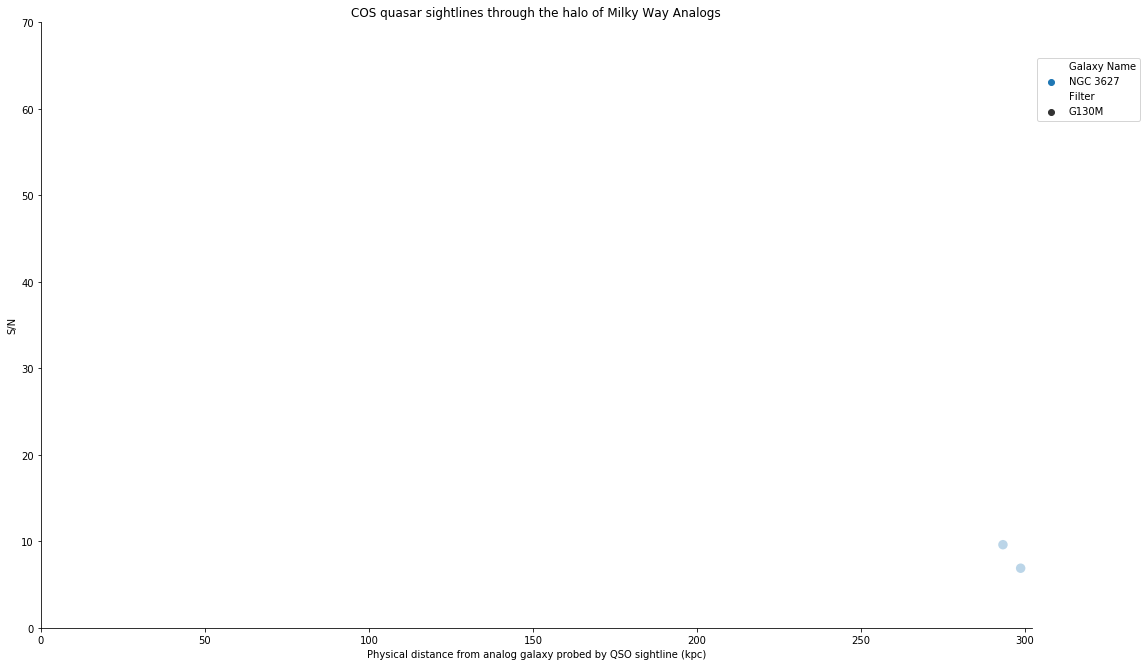

In [600]:
plot_df = sightlines[sightlines['S/N'].notnull()]
plot_df = sightlines[sightlines['Galaxy Name'] == 'NGC 3627']

fg = sb.FacetGrid(data=sightlines, hue='Galaxy Name', height=9,aspect=1.61)
fg.set(xscale="linear", yscale="linear")
fg = sb.scatterplot(x=plot_df['impact_param'], y=plot_df['S/N'],hue=plot_df['Galaxy Name'],style=plot_df['Filter'],s=90,edgecolor='none',alpha=0.3)

plt.xlim(0,302)
plt.ylim(0,70)


plt.title('COS quasar sightlines through the halo of Milky Way Analogs')
plt.ylabel("S/N")
plt.xlabel("Physical distance from analog galaxy probed by QSO sightline (kpc)")
plt.legend(bbox_to_anchor=(1, 0.95), loc='upper left', ncol=1)
plt.show()

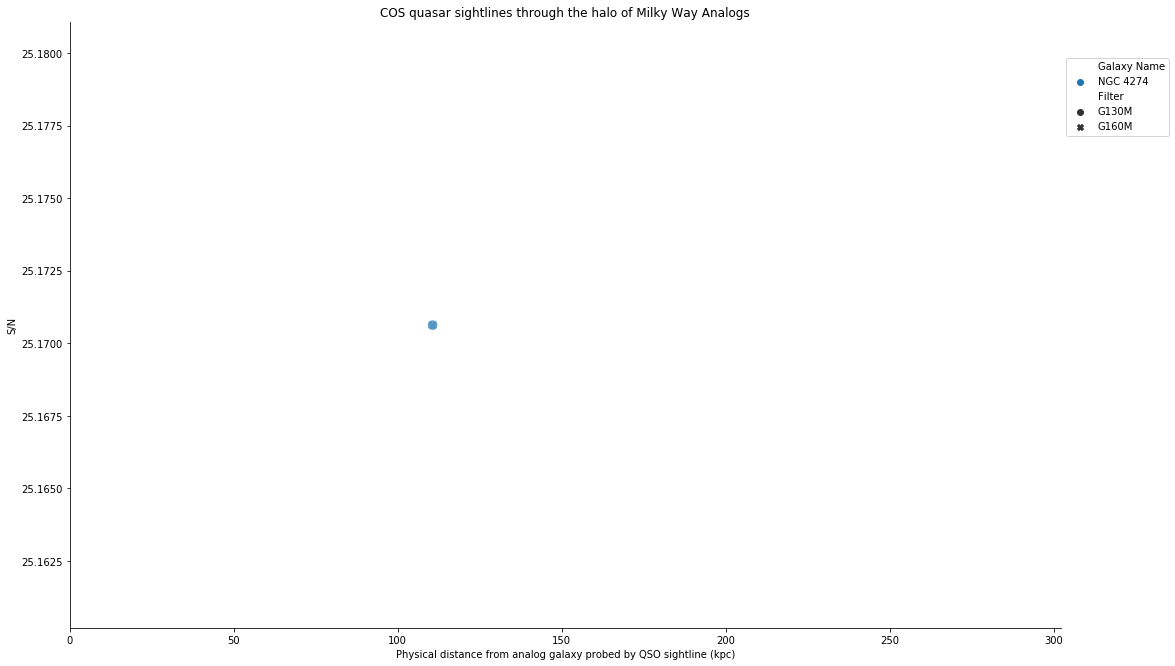

In [614]:
plot_df = sightlines[sightlines['Galaxy Name'] == 'NGC 4274']

fg = sb.FacetGrid(data=sightlines, hue='Galaxy Name', height=9,aspect=1.61)
fg.set(xscale="linear", yscale="linear")
fg = sb.scatterplot(x=plot_df['impact_param'], y=plot_df['S/N'],hue=plot_df['Galaxy Name'],style=plot_df['Filter'],s=90,edgecolor='none',alpha=0.3)

plt.xlim(0,302)
#plt.ylim(0,20)


plt.title('COS quasar sightlines through the halo of Milky Way Analogs')
plt.ylabel("S/N")
plt.xlabel("Physical distance from analog galaxy probed by QSO sightline (kpc)")
plt.legend(bbox_to_anchor=(1, 0.95), loc='upper left', ncol=1)
plt.show()

# On the Sky

In [ ]:
sightlines[sightlines['Galaxy Name'] == 'NGC 4517']

In [ ]:
sightlines.columns

In [ ]:
sightlines['analog_coords'].ra.deg

In [ ]:
plt.subplot(111, projection='aitoff')
plt.grid(True)

coords = SkyCoord(sightlines['analog_ra'], sightlines['analog_dec'].dec.deg, frame='ICRS', unit=u.deg)

cmap='viridis'
plt.scatter(coords.ra.wrap_at('180d').radian, coords.dec.radian, color=sightlines['Galaxy Name'])